**Кратий план работы:**

**Анализ интернет магазина "Стримчик":**

1. Открыть файл и посмотреть информацию, посмотреть наличие пропусков и дубликатов, зафиксировать начальные данные.
2. Заменить названия столбоцов, обработать пропуски, преобразовать типы столбцов, посчитать суммарные продажи.
3. Произвести исследовательский анализ с помощью графиков и гистрограмм.
4. Определить портрет для каждого пользователя региона.
5. Произвести проверку гипотез.
6. Написать общий вывод.
7. **Цель исследования:** выявить определяющие успешность игры закономерности для планирования рекламной компании на 2017 год.

## Шаг №1 Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

In [2]:
#open file
try:
    real_estate = pd.read_csv('/datasets/games.csv')
except:
    url = 'https://drive.google.com/file/d/1Op_WflFiTP2yTB9Nx99HWvB4jbXb82It/view?usp=drive_link'
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    games = pd.read_csv(path)

In [3]:
# Функция для просмотра информации о DataFrame
def info_data_frame (x):
    return display(x.info(), 
        'Вывод первых 5 строчек:', x.head(), 
        f'Число строк : {x.shape[0]}', 
        f'Число столбцов : {x.shape[1]}', 
        f'Количество дубликатов = {x.duplicated().sum()}'),

In [4]:
info_data_frame(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

'Вывод первых 5 строчек:'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


'Число строк : 16715'

'Число столбцов : 11'

'Количество дубликатов = 0'

(None,)

In [5]:
# Проверка на неявные дубликаты
display(games[games.duplicated(['Name', 'Platform', 'Year_of_Release'])].count())
display(games[games.duplicated(['Name', 'Platform', 'Year_of_Release'])])

Name               1
Platform           2
Year_of_Release    2
Genre              1
NA_sales           2
EU_sales           2
JP_sales           2
Other_sales        2
Critic_Score       1
User_Score         1
Rating             1
dtype: int64

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; padding: 10px;">
    
**Вывод по разделу:** 

Выведена информация по датафрейму:
1. DataFrame **`games`** состоит из 16715 строк и 11 столбцов, в которых отсутствуют явные дубликаты, пропуски имеются в столбцах `Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating`.
2. После проверки были найдены неявные дубликаты, которые в последствии будут устранены. 
3. Нужно привести колонки к нижнему регистру.
4. Преобразовать к нужному типу данных.
</div>

## Шаг №2 Подготовка данных

In [6]:
#Приведение к нижнему регистру
games.columns = games.columns.str.lower() 

In [7]:
# Удаление неявных дубликатов
games = games.drop_duplicates(['name', 'platform', 'year_of_release'])
display(games[games.duplicated(['name', 'platform', 'year_of_release'])].count())
display(games[games.duplicated(['name', 'platform', 'year_of_release'])])

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
games.isna().sum() #Пропуски

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [10]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Удаление и замена пропусков

#### Столбец `name` имеет пропуски

In [11]:
games = games.dropna(subset=['name'])
games.name.isna().sum()

0

#### Столбец `year_of_release` имеет пропуски

In [12]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
#Удаление пропусков
games = games.dropna(subset=['year_of_release'])
games.year_of_release.isna().sum()

0

In [14]:
#Преобразование к целочисленному значению
games['year_of_release'] = games['year_of_release'].astype(int) 
games['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int32

#### Столбец `critic_score` имеет пропуски

In [15]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
display(f"Количество пропусков: \
        {(games['critic_score'].isna().sum() / len(games['name'])*100).round(2)}%")

'Количество пропусков:         51.46%'

In [17]:
#games['critic_score'] = games['critic_score'].fillna(0)
#games['critic_score'].isna().sum()

In [18]:
#Замена пропусков на -1
games['critic_score'] = games['critic_score'].fillna(-1)
games['critic_score'].isna().sum()

0

In [19]:
games['critic_score'].unique() #Проверка

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [20]:
games['critic_score'] = games['critic_score'].astype(int)

In [21]:
games['critic_score'].unique()

array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
    Количество пропусков больше 50%, заменяем на 0, преобразуем столбец к типу `int`
</div>

#### Столбец `user_score` имеет пропуски

In [22]:
games['user_score'].unique() #Уникальные значения

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [23]:
display(f"Количество пропусков: \
        {(games['user_score'].isna().sum() / len(games['name'])*100).round(2)}%")

'Количество пропусков:         40.17%'

In [24]:
#Замена на 0
games['user_score'] = games['user_score'].fillna(-1)
games['user_score'].isna().sum()

0

In [25]:
#Замена на 0
#games['user_score'] = games['user_score'].fillna(0)
#games['user_score'].isna().sum()

In [26]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1

In [27]:
games['user_score'].unique() #Уникальные значения

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [28]:
# Приведение к типу float
games['user_score']= games['user_score'].astype(float)

In [29]:
# Проверка
games.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           9767 non-null   object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
    Количество пропусков больше 40%, заменяем на 0, так же имеется `tbd`, тоже заменяем на 0, преобразуем столбец к типу `float`
</div>

#### Столбец `rating` имеет пропуски

In [30]:
set(games['rating'].unique()) #Уникальные значения

{'AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan}

In [31]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN


In [32]:
display(f"Количество пропусков: \
        {(games['rating'].isna().sum() / len(games['name'])*100).round(2)}%")

'Количество пропусков:         40.6%'

In [33]:
#Замена на unknow
games['rating'] = games['rating'].fillna('unknow')
games['rating'].isna().sum()

0

In [34]:
set(games['rating'].unique()) #Уникальные значения

{'AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'unknow'}

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
    Количество пропусков больше 40%, заменяем на unknow.
</div>

In [35]:
games['revenue'] = games.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknow,31.38


<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; padding: 10px;">

**Вывод по разделу:** 
1. Устранены неявные дубликаты.   
2. Заменены или удалены пропуски в столбцах **`name`, `year_of_release`, `critic_score`, `rating`**.
3. Столбец **`year_of_release`** приведен к целочисленному значению `int`, **`critic_score`** приведен к `int`, **`user_score`** к `float`.
4. Посчитана суммарная выручка по всем регионам и выделена в отдельный столбец `revenue`.
5. Пропуски могли появиться в результате человеческого фактора, например данные по оценкам критиков или пользователей могли отсутствовать, так же возможен сбор данных из различных источников, которые не связаны между собой. Так же пропуски в колонке `rating` могли появиться из за системы рейтинга `ESRB`, так как это система рейтингов, используемая в США и Канаде, в Японии используется система рейтингов `CERO`. Она включает четыре возрастные категории: «А» (для всех возрастов), «B» (старше 12 лет), «C» (старше 15 лет) и «Z» (от 18 лет и старше). Так же продажи игры могли быть низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки.
    
</div>

## Шаг №3 Проведение исследовательского анализа данных

### Количество игр, выпущенное по годам

In [37]:
#Количество выпущенных игр по годам
games['year_of_release'].value_counts() 

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [38]:
games['year_of_release'].describe().round(2)

count    16443.00
mean      2006.49
std          5.88
min       1980.00
25%       2003.00
50%       2007.00
75%       2010.00
max       2016.00
Name: year_of_release, dtype: float64

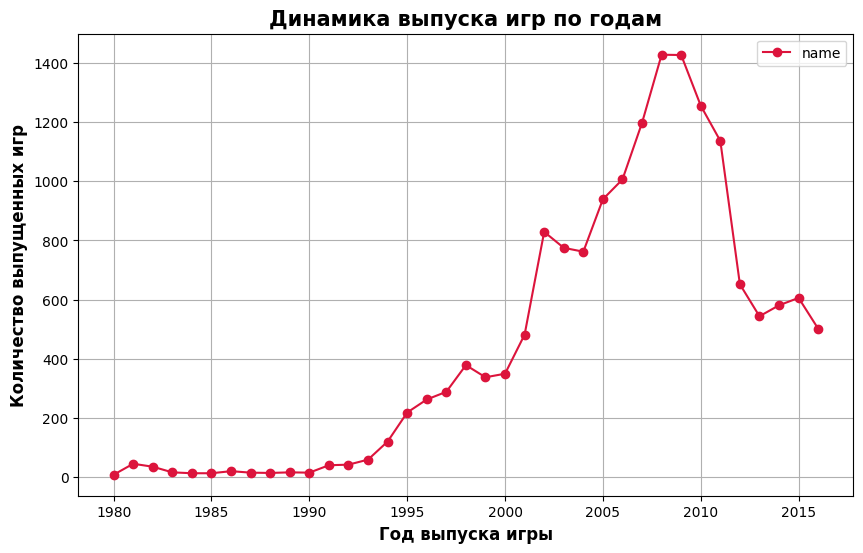

In [39]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count') \
    .plot(
        grid=True,
        style='o-',
        figsize=(10, 6),
        color='#DC143C'
    )
plt.title('Динамика выпуска игр по годам', fontsize=15, fontweight="bold")
plt.xlabel('Год выпуска игры', fontsize=12, fontweight="bold")
plt.ylabel('Количество выпущенных игр', fontsize=12, fontweight="bold")
plt.show()

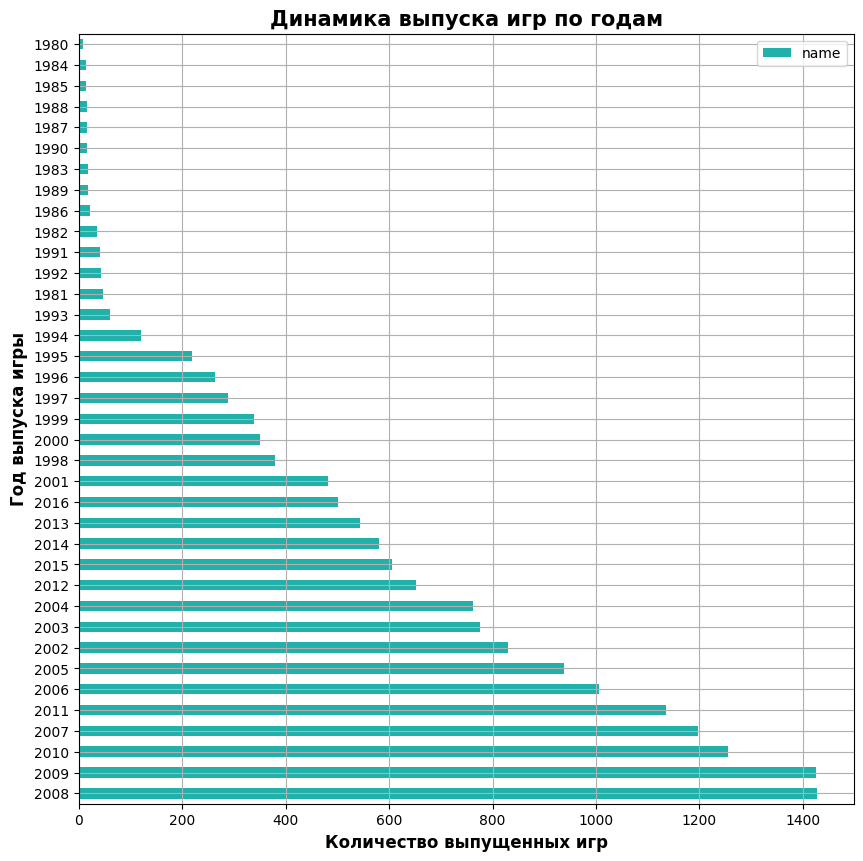

In [40]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False) \
    .plot(
        kind='barh',
        grid=True,
        figsize=(10, 10),
        color='#20B2AA'
    )
plt.title('Динамика выпуска игр по годам', fontsize=15, fontweight="bold")
plt.xlabel('Количество выпущенных игр', fontsize=12, fontweight="bold")
plt.ylabel('Год выпуска игры', fontsize=12, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">
    
**Вывод:**  
    
- На графике видно подъём продаж после 1994 года, возможно это связано с тем, что начали появляться игровые консоли, например `PlayStation`. Пик продаж приходится на 2008 год, где возможно был технологический прорыв в игровой индустрии. В период с 2008 по 2010 год игровая индустрия продолжала развиваться, после произошел спад
- В рамках исследования целесообразно рассмотреть временной интервал от 5 до 10 лет, поскольку устаревшие игры теряют свою актуальность, а новые продукты оказывают большее влияние на рынок.
    
</div>

### Изменения продаж по платформам

In [41]:
games['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

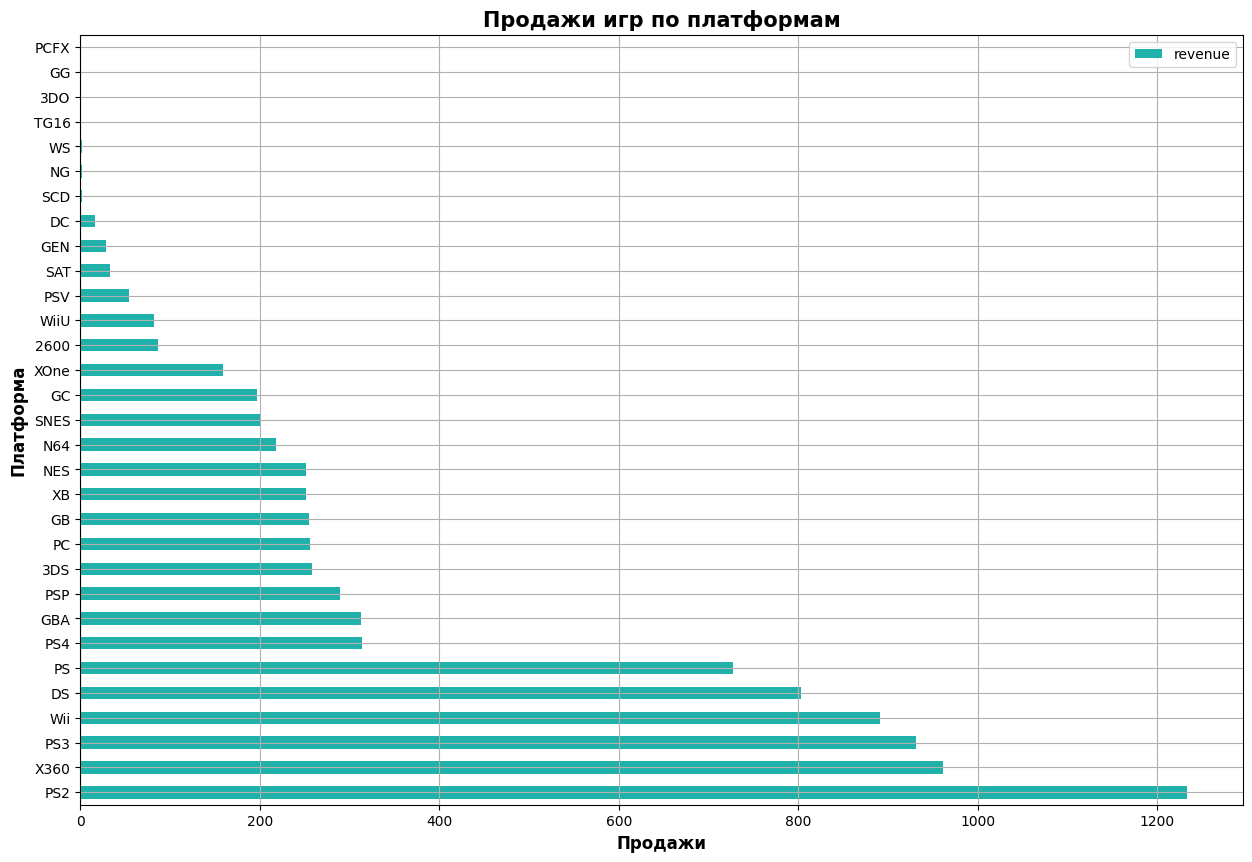

In [42]:
games.pivot_table(index='platform', values='revenue', aggfunc='sum').sort_values(by='revenue', ascending=False) \
    .plot(
        kind='barh',
        grid=True,
        figsize=(15, 10),
        color='#20B2AA'
    )
plt.title('Продажи игр по платформам', fontsize=15, fontweight="bold")
plt.xlabel('Продажи', fontsize=12, fontweight="bold")
plt.ylabel('Платформа', fontsize=12, fontweight="bold")
plt.show()

In [43]:
#Находим 6 платформ с наибольшими продажами
top = games.pivot_table(index='platform', values='revenue', aggfunc='sum') \
    .sort_values(by='revenue', ascending=False) \
    .reset_index().head(6)['platform'].tolist()
top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [44]:
for platform in top :
    game = games.query('platform == @platform') \
    .pivot_table(index=['platform','year_of_release'], 
                 values='revenue', 
                 aggfunc='sum')
    display(game.round(2).T)

platform           PS2                                                         \
year_of_release   2000    2001    2002    2003    2004    2005    2006   2007   
revenue          39.17  166.43  205.38  184.31  211.81  160.66  103.42  75.99   

platform                                 
year_of_release  2008  2009  2010  2011  
revenue          53.9  26.4  5.64  0.45

platform         X360                                                       \
year_of_release  2005   2006   2007    2008    2009    2010    2011   2012   
revenue          8.25  51.62  95.41  135.26  120.29  170.03  143.84  99.74   

platform                                    
year_of_release   2013   2014   2015  2016  
revenue          88.58  34.74  11.96  1.52

platform           PS3                                                         \
year_of_release   2006   2007    2008    2009    2010    2011    2012    2013   
revenue          20.96  73.19  118.52  130.93  142.17  156.78  107.35  113.25   

platform                            
year_of_release   2014   2015 2016  
revenue          47.76  16.82  3.6

platform            Wii                                                      \
year_of_release    2006    2007    2008    2009    2010   2011   2012  2013   
revenue          137.15  152.77  171.32  206.97  127.95  59.65  21.71  8.59   

platform                           
year_of_release  2014  2015  2016  
revenue          3.75  1.14  0.18

platform           DS                                                        \
year_of_release  1985   2004    2005    2006    2007    2008    2009   2010   
revenue          0.02  17.27  130.14  119.81  146.94  145.31  119.54  85.02   

platform                             
year_of_release   2011   2012  2013  
revenue          26.18  11.01  1.54

platform           PS                                                     \
year_of_release  1994   1995  1996    1997    1998    1999   2000   2001   
revenue          6.03  35.96  94.7  136.17  169.49  144.53  96.37  35.59   

platform                     
year_of_release  2002  2003  
revenue          6.67  2.07

In [45]:
#Общее число продаж игр для каждой из 6 платформ
games.pivot_table(index='platform', values='revenue', aggfunc='sum') \
    .sort_values(by='revenue', ascending=False).head(6).round(2).T

platform,PS2,X360,PS3,Wii,DS,PS
revenue,1233.56,961.24,931.33,891.18,802.78,727.58


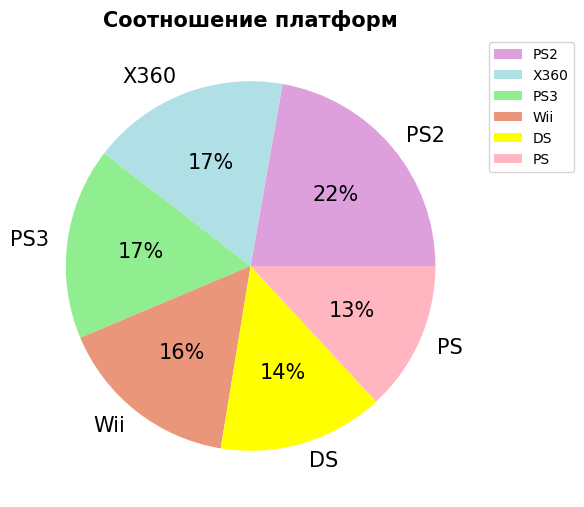

In [46]:
color_list = '#DDA0DD', \
    '#B0E0E6', \
    '#90EE90', \
    '#E9967A', \
    '#FFFF00',\
    '#FFB6C1', \
    '#32CD32', \
    '#7B68EE'

games.pivot_table(index='platform', values='revenue', aggfunc='sum') \
    .sort_values(by='revenue', ascending=False).head(6) \
    .plot(
    x='platform',
    y='revenue', 
    kind='pie',
    figsize=(10, 6),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.title('Соотношение платформ', fontsize=15, fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1.0))
plt.ylabel(None)
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">
    
**Вывод:**  
    
- По результатам сумарных продаж стало известно, что имеются 6 платформ с наибольшим количеством продаж, `PS2, X360', PS3, Wii, DS, PS`. Сводные таблицы показывают, что Платформы компании Sony (`PS2 - 1233.56, PS3 - 931.33, PS - 727.58`) и Microsoft (`X360 - 961.24`) удерживают лидерство, так же в пятерку входят две Японские консоли компании Nintendo (`Wii - 891.18, DS - 802.76`)
    
</div>

### Жизенный цикл платформы

In [47]:
top = games.pivot_table(index='platform', values='revenue', aggfunc='sum') \
    .sort_values(by='revenue', ascending=False) \
    .reset_index().head(6)['platform'].tolist()

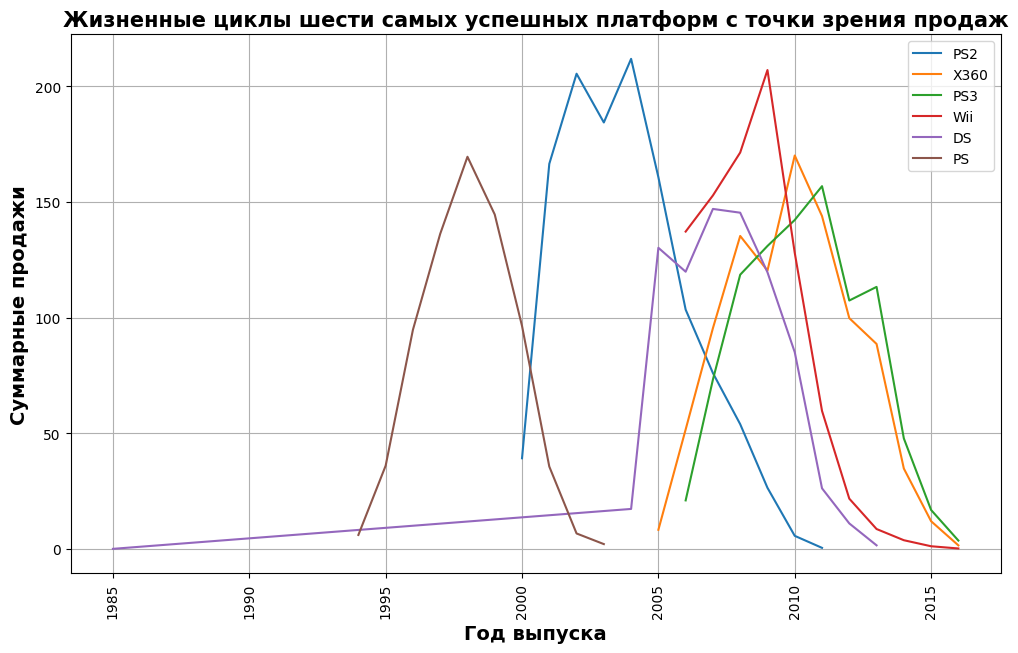

In [48]:
for name in top:
    (
    games.query('platform == @name') \
    .pivot_table(index = 'year_of_release', values = 'revenue', aggfunc = 'sum') \
    .sort_values('year_of_release')['revenue'] \
    .plot(figsize = (12, 7), label=name, grid=True)
    )
    plt.title('Жизненные циклы шести самых успешных платформ с точки зрения продаж', \
              fontsize=15, fontweight="bold")
    plt.xticks(rotation=90, fontsize=10)
    plt.xlabel('Год выпуска', fontsize=14, fontweight="bold")
    plt.ylabel('Суммарные продажи', fontsize=14, fontweight="bold")
    plt.legend() 

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">
    
**Вывод:**  
    
- на графике видно отклонение у платформы `DS`, сделаем срез и перестроим график.
    
</div>

In [49]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [50]:
display(games.query('platform == "DS" and year_of_release < 2000'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,unknow,0.02


In [51]:
games = games.drop(index=15957) #Удаляем строку 15957

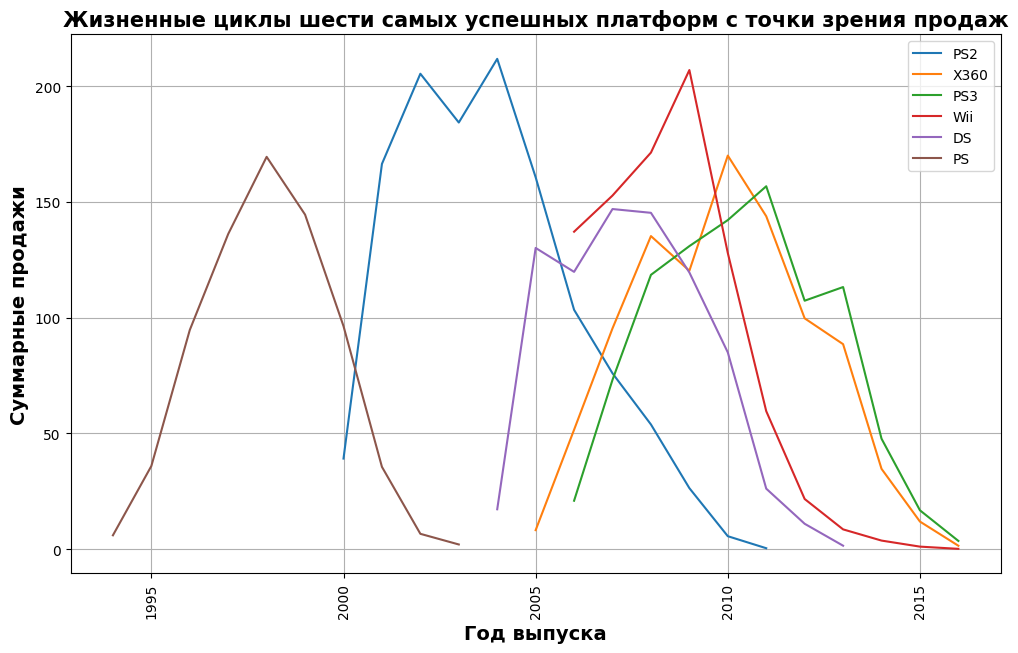

In [52]:
for name in top:
    (
    games.query('platform == @name') \
    .pivot_table(index = 'year_of_release', values = 'revenue', aggfunc = 'sum') \
    .sort_values('year_of_release')['revenue'] \
    .plot(figsize = (12, 7), label=name, grid=True)
    )
    plt.title('Жизненные циклы шести самых успешных платформ с точки зрения продаж', \
              fontsize=15, fontweight="bold")
    plt.xticks(rotation=90, fontsize=10)
    plt.xlabel('Год выпуска', fontsize=14, fontweight="bold")
    plt.ylabel('Суммарные продажи', fontsize=14, fontweight="bold")
    plt.legend() 

In [53]:
time_life = games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# в срок жизни платформы, должны входить границы диапазона, поэтому +1
time_life['life'] = time_life['max'] - time_life['min'] + 1 
print('Медианное значение жизненного цикла по всей выборке', time_life['life'].median(), 'лет')

Медианное значение жизненного цикла по всей выборке 7.0 лет


In [54]:
period = np.ceil(time_life['life'].median()/2)
print('Определим актуальный период за последние', period, 'года')

Определим актуальный период за последние 4.0 года


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">  
    
**Вывод:**  
    
- Срок жизненного цикла большинства платформ составляет от 5 до 10 лет. Это означает, что платформы достигают пика популярности и стабильности в течение этого периода, после чего их жизненный цикл подходит к концу и они могут перейти в стадию спада или быть заменены новыми платформами. Определим актуальный период с 2013 по 2016 год.    
</div>

### Статистика продаж и падений

In [55]:
# Срез 
current_period = games.query('year_of_release > 2012')

In [56]:
current_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknow,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknow,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [57]:
current_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   int32  
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  revenue          2233 non-null   float64
dtypes: float64(6), int32(2), object(4)
memory usage: 209.3+ KB


In [58]:
current_period.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
revenue            0
dtype: int64

In [59]:
#Сводная таблица по лидерам продаж
successful_platform = pd.pivot_table(current_period, index=['platform','year_of_release'], 
                                     values='revenue', aggfunc = 'sum')
successful_platform

revenue
platform year_of_release         
3DS      2013               56.57
         2014               43.76
         2015               27.78
         2016               15.14
DS       2013                1.54
PC       2013               12.38
         2014               13.28
         2015                8.52
         2016                5.25
PS3      2013              113.25
         2014               47.76
         2015               16.82
         2016                3.60
PS4      2013               25.99
         2014              100.00
         2015              118.90
         2016               69.25
PSP      2013                3.14
         2014                0.24
         2015                0.12
PSV      2013               10.59
         2014               11.90
         2015                6.25
         2016                4.25
Wii      2013                8.59
         2014                3.75
         2015                1.14
         2016                0.18
WiiU     2013               21.65
         2014               22.03
         2015               16.35
         2016                4.60
X360     2013               88.58
         2014               34.74
         2015               11.96
         2016                1.52
XOne     2013               18.96
         2014               54.07
         2015               60.14
         2016               26.15

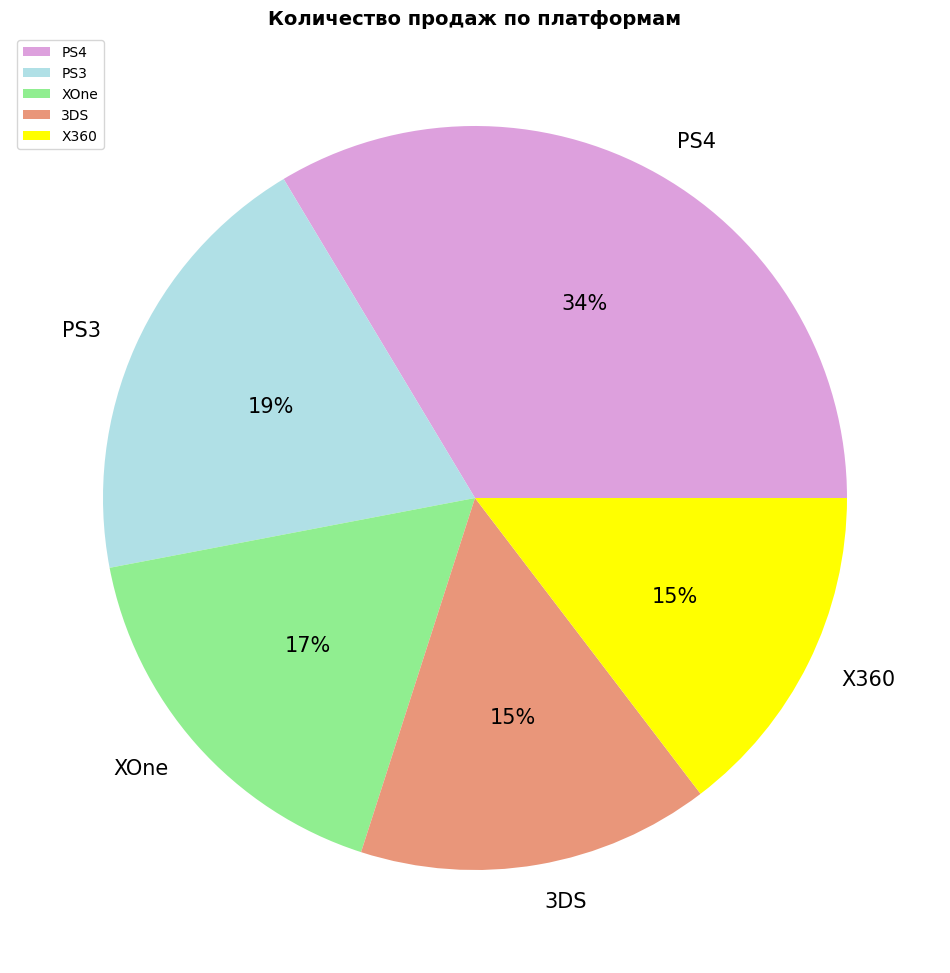

In [60]:
successful_platform \
    .pivot_table(index='platform', values='revenue', aggfunc = 'sum') \
    .sort_values(by='revenue', ascending=False).head() \
    .plot(
    x='platform',
    y='revenue', 
    kind='pie',
    figsize=(12, 13),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.title('Количество продаж по платформам', fontsize=14, fontweight="bold")
plt.ylabel(None)
plt.show()


In [61]:
successful_platform \
    .pivot_table(index='platform', values='revenue', aggfunc = 'sum') \
    .sort_values(by='revenue', ascending=False) \
    .round(0).head(10).T

platform,PS4,PS3,XOne,3DS,X360,WiiU,PC,PSV,Wii,PSP
revenue,314.0,181.0,159.0,143.0,137.0,65.0,39.0,33.0,14.0,3.0


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- На основе предоставленной информации можно сделать вывод, что `PlayStation 4` является лидером продаж среди игровых консолей за период с 2013 по 2016 год - 314 копий. В пятёрку также входят `PlayStation 3` - 181 копия, `Xbox One` - 159 копия, `3DS` - 143 копия и `Xbox` 360 - 137 копия. Если посмотреть сводную таблицу по годам, то заметно, что у всех консолей с 2013 по 2016 год наблюдается спад.
</div>

### Глобальные продажи игр в разбивке

In [69]:
current_period['revenue'].describe().round(2)

count    2233.00
mean        0.49
std         1.24
min         0.01
25%         0.03
50%         0.11
75%         0.40
max        21.05
Name: revenue, dtype: float64

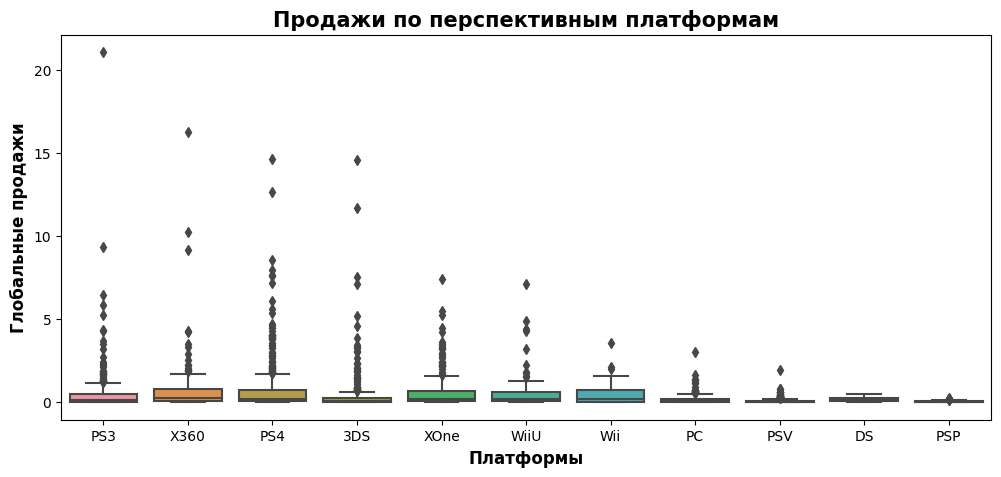

In [180]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data=current_period, x='platform', y='revenue')
plt.title('Продажи по перспективным платформам', fontsize=15, fontweight="bold")
plt.xlabel('Платформы', fontsize=12, fontweight="bold")
plt.ylabel('Глобальные продажи',fontsize=12, fontweight="bold")
plt.show()

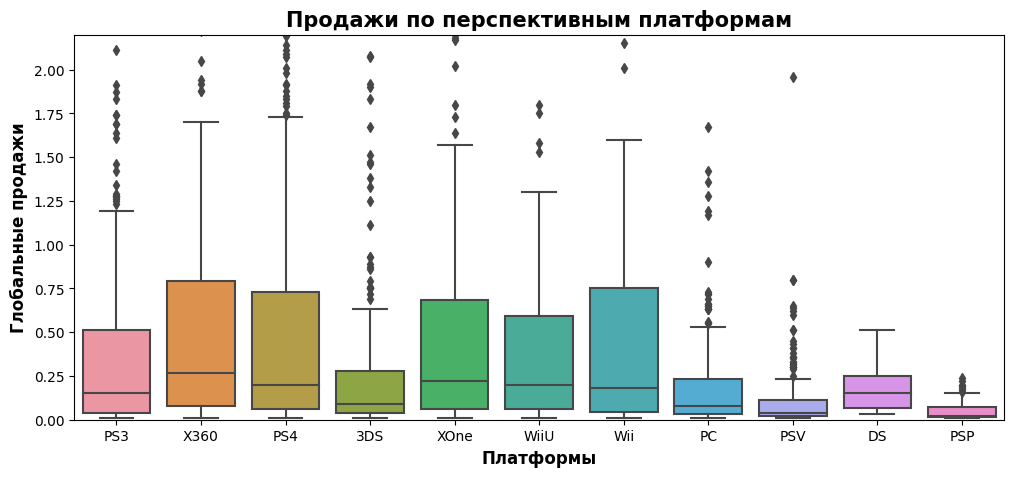

In [71]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data=current_period, x='platform', y='revenue')
ax.set(ylim=(0,2.2))
plt.title('Продажи по перспективным платформам', fontsize=15, fontweight="bold")
plt.xlabel('Платформы', fontsize=12, fontweight="bold")
plt.ylabel('Глобальные продажи',fontsize=12, fontweight="bold")
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- График демонстрирует, что медиана находится в диапазоне - 0.11
- Размах между первым и третьим квартилями значительный.
- Можно сказать, что на графиках почти для всех консолей имеются выбросы.
</div>

### Влияние отзывов на продажи внутри одной платформы

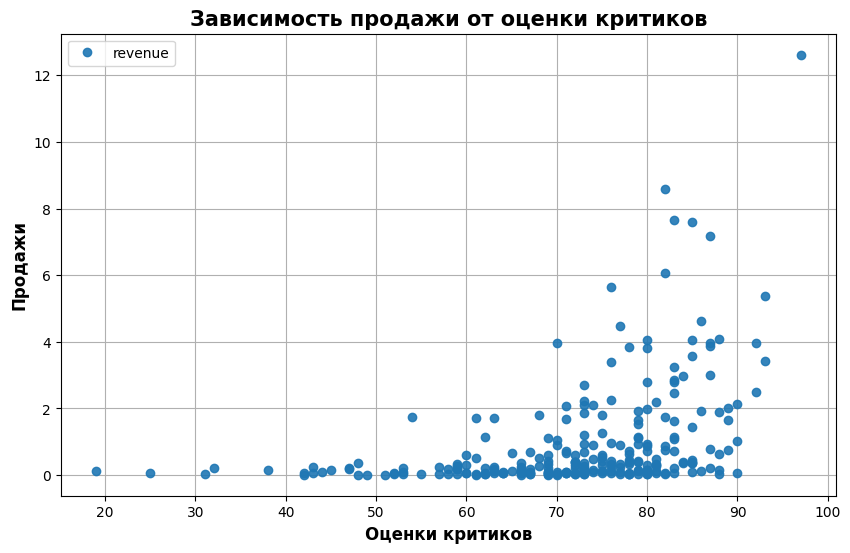

In [72]:
current_period.query("platform == 'PS4' and critic_score > -1") \
    .plot(x='critic_score',
    y = 'revenue',
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.9
)
plt.title('Зависимость продажи от оценки критиков', fontsize=15, fontweight="bold")
plt.xlabel('Оценки критиков', fontsize=12, fontweight="bold")
plt.ylabel('Продажи', fontsize=12, fontweight="bold")
plt.show()

In [73]:
display('Корреляция между оценкой критиков и продажами по платформе PS4' )
current_period.query("platform == 'PS4' and critic_score  > -1")['critic_score'] \
    .corr(current_period['revenue']).round(2)

'Корреляция между оценкой критиков и продажами по платформе PS4'

0.41

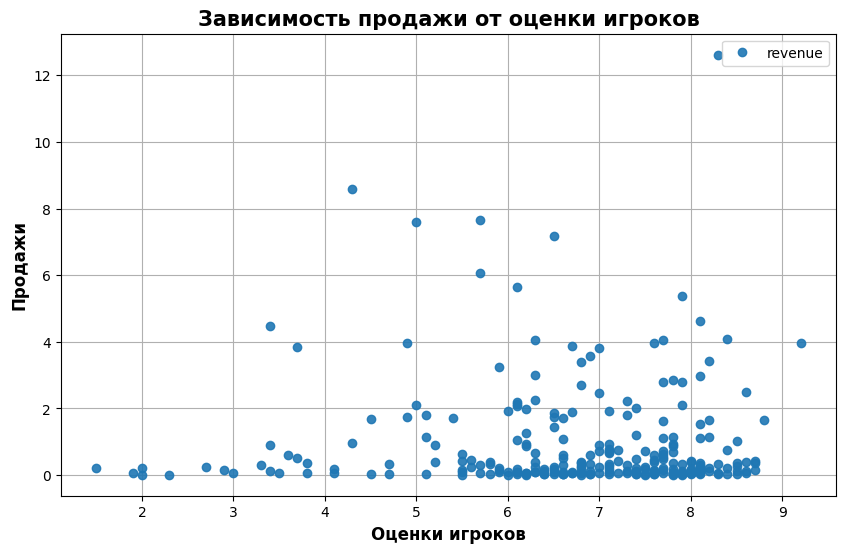

In [74]:
current_period.query("platform == 'PS4' and user_score > -1") \
    .plot(x='user_score',
    y = 'revenue',      
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.9
)
plt.title('Зависимость продажи от оценки игроков', fontsize=15, fontweight="bold")
plt.xlabel('Оценки игроков', fontsize=12, fontweight="bold")
plt.ylabel('Продажи', fontsize=12, fontweight="bold")
plt.show()

In [75]:
display('Корреляция между оценкой пользователей и продажами по платформе PS4:' )
current_period.query("platform == 'PS4' and user_score > -1")['user_score'] \
    .corr(current_period['revenue']).round(2)

'Корреляция между оценкой пользователей и продажами по платформе PS4:'

-0.03

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- Коэфициент кореляции показывает, что между продажами и оценкой критика прослеживается слабая связь (0.41)  в пределе одной платформы, продажи не зависят от оценки пользователя - (-0.03).
</div>

### Влияние отзывов на продажи других платформ

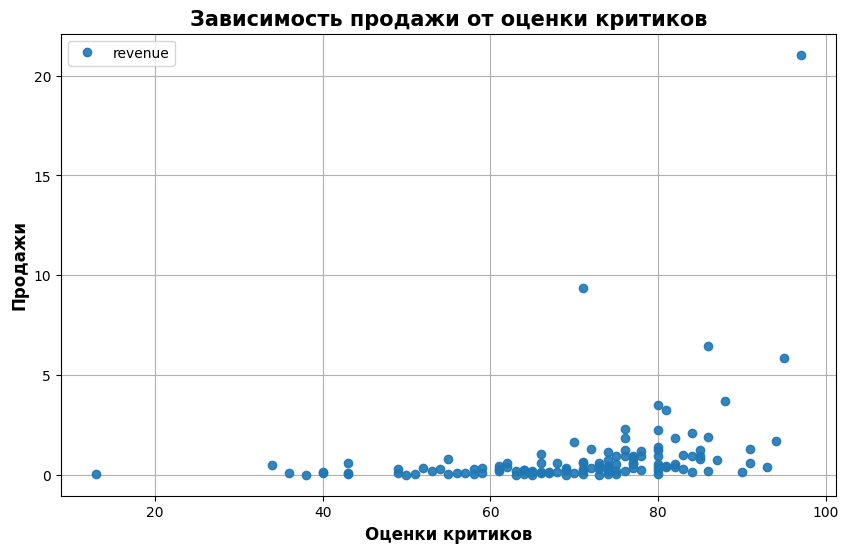

In [78]:
current_period.query("platform == 'PS3' and critic_score > -1") \
    .plot(x='critic_score',
    y = 'revenue',
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.9
)
plt.title('Зависимость продажи от оценки критиков', fontsize=15, fontweight="bold")
plt.xlabel('Оценки критиков', fontsize=12, fontweight="bold")
plt.ylabel('Продажи', fontsize=12, fontweight="bold")
plt.show()

In [79]:
display('Корреляция между оценкой критиков и продажами по платформе PS3' )
current_period.query("platform == 'PS3' and critic_score  > -1")['critic_score'] \
    .corr(current_period['revenue']).round(2)

'Корреляция между оценкой критиков и продажами по платформе PS3'

0.33

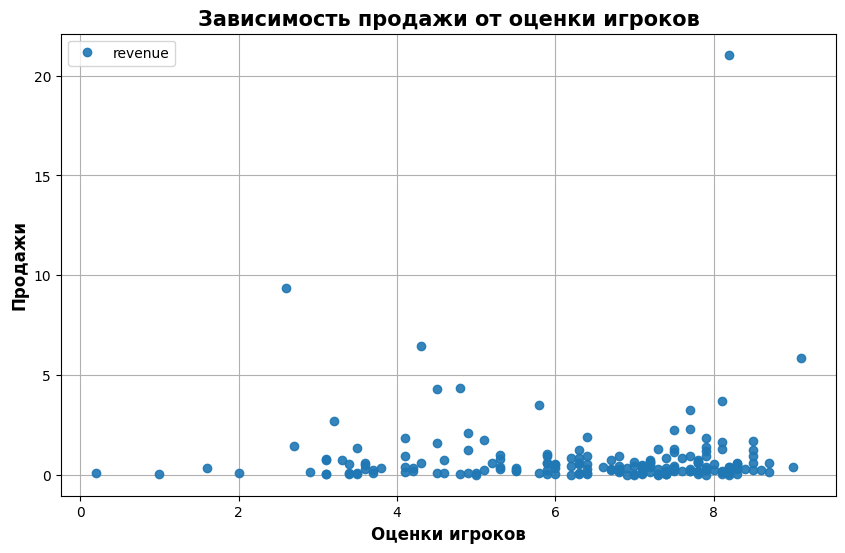

In [80]:
current_period.query("platform == 'PS3' and user_score > -1") \
    .plot(x='user_score',
    y = 'revenue',
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.9
)
plt.title('Зависимость продажи от оценки игроков', fontsize=15, fontweight="bold")
plt.xlabel('Оценки игроков', fontsize=12, fontweight="bold")
plt.ylabel('Продажи', fontsize=12, fontweight="bold")
plt.show()

In [81]:
display('Корреляция между оценкой пользователей и продажами по платформе PS3:' )
current_period.query("platform == 'PS3' and user_score > -1")['user_score'] \
    .corr(current_period['revenue']).round(2)

'Корреляция между оценкой пользователей и продажами по платформе PS3:'

0.0

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- Между `critic_score` и `revenue` слабая зависимость - 0.33, `revenue` не зависит от `user_score` - 0.0 
</div>

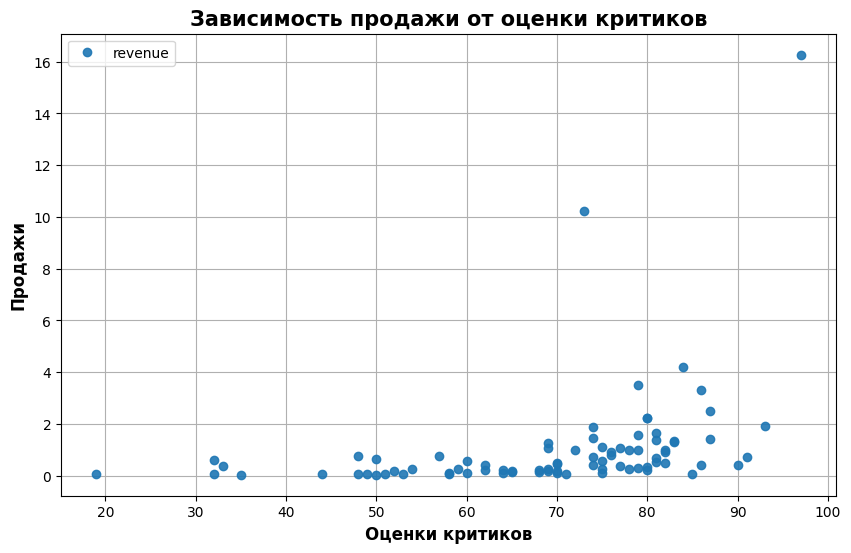

In [83]:
current_period.query("platform == 'X360' and critic_score > -1") \
    .plot(x='critic_score',
    y = 'revenue',
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.9
)
plt.title('Зависимость продажи от оценки критиков', fontsize=15, fontweight="bold")
plt.xlabel('Оценки критиков', fontsize=12, fontweight="bold")
plt.ylabel('Продажи', fontsize=12, fontweight="bold")
plt.show()

In [84]:
display('Корреляция между оценкой критиков и продажами по платформе X360' )
current_period.query("platform == 'X360' and critic_score  > -1")['critic_score'] \
    .corr(current_period['revenue']).round(2)

'Корреляция между оценкой критиков и продажами по платформе X360'

0.35

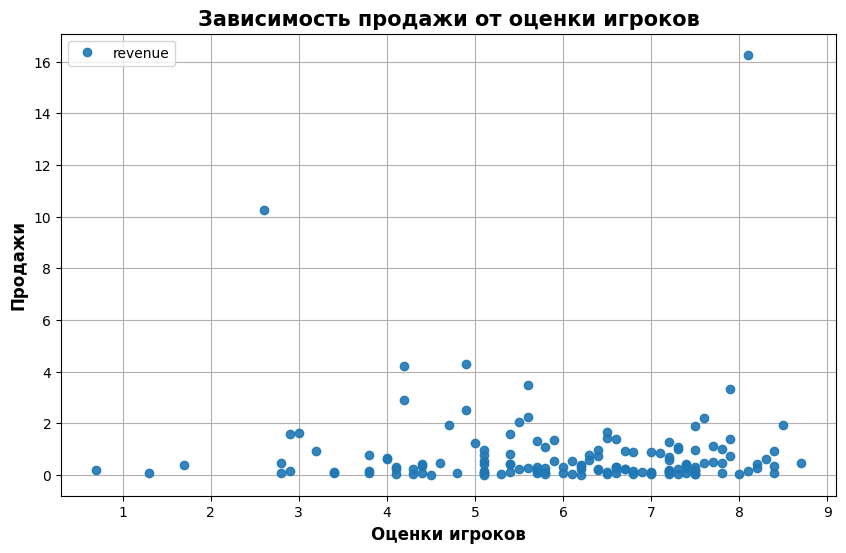

In [85]:
current_period.query("platform == 'X360' and user_score > -1") \
    .plot(x='user_score',
    y = 'revenue',
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.9
)
plt.title('Зависимость продажи от оценки игроков', fontsize=15, fontweight="bold")
plt.xlabel('Оценки игроков', fontsize=12, fontweight="bold")
plt.ylabel('Продажи', fontsize=12, fontweight="bold")
plt.show()

In [86]:
display('Корреляция между оценкой пользователей и продажами по платформе X360:' )
current_period.query("platform == 'X360' and user_score > -1")['user_score'] \
    .corr(current_period['revenue']).round(2)

'Корреляция между оценкой пользователей и продажами по платформе X360:'

-0.01

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- На платформе `X360` похожая ситуация, между продажами и оценкой критика прослеживается слабая связь - (0.35), оценка пользователя почти не влияет на продажи (-0.01).
</div>

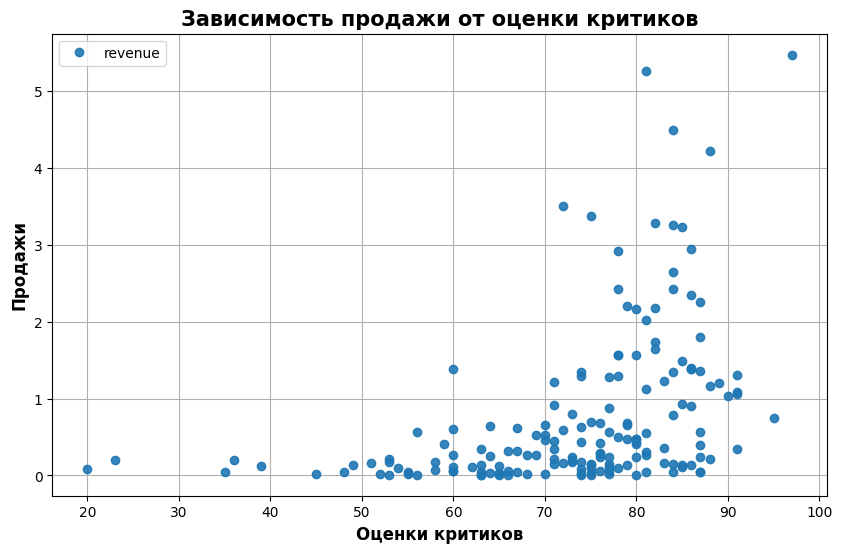

In [88]:
current_period.query("platform == 'XOne' and critic_score > -1") \
    .plot(x='critic_score',
    y = 'revenue',
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.9
)
plt.title('Зависимость продажи от оценки критиков', fontsize=15, fontweight="bold")
plt.xlabel('Оценки критиков', fontsize=12, fontweight="bold")
plt.ylabel('Продажи', fontsize=12, fontweight="bold")
plt.show()

In [89]:
display('Корреляция между оценкой критиков и продажами по платформе X360' )
current_period.query("platform == 'XOne' and critic_score  > -1")['critic_score'] \
    .corr(current_period['revenue']).round(2)

'Корреляция между оценкой критиков и продажами по платформе X360'

0.42

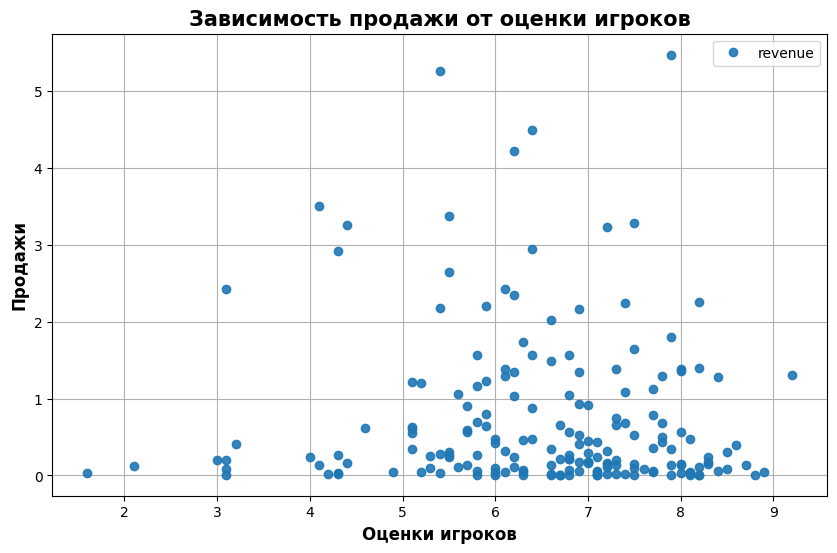

In [90]:
current_period.query("platform == 'XOne' and user_score > -1") \
    .plot(x='user_score',
    y = 'revenue',
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.9
)
plt.title('Зависимость продажи от оценки игроков', fontsize=15, fontweight="bold")
plt.xlabel('Оценки игроков', fontsize=12, fontweight="bold")
plt.ylabel('Продажи', fontsize=12, fontweight="bold")
plt.show()

In [91]:
display('Корреляция между оценкой пользователей и продажами по платформе XOne:' )
current_period.query("platform == 'XOne' and user_score > -1")['user_score'] \
    .corr(current_period['revenue']).round(2)

'Корреляция между оценкой пользователей и продажами по платформе XOne:'

-0.07

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- На платформе `XOne` так же оценка критика не сильно влияет на продажи (0.42), а оценка пользователя не влияет на продажи (-0.07).
</div>

### Распределение по жанрам

In [93]:
current_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknow,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknow,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [94]:
#Сводная таблица по сумме продаж
current_period.pivot_table(index='genre', values='revenue', aggfunc='sum') \
    .sort_values(by='revenue', ascending=False).round(2).T

genre,Action,Shooter,Sports,Role-Playing,Misc,Platform,Racing,Fighting,Adventure,Simulation,Strategy,Puzzle
revenue,321.87,232.98,150.65,145.89,62.82,42.63,39.89,35.31,23.64,21.76,10.08,3.17


In [95]:
#Сводная таблица по медианным продажам
current_period.pivot_table(index='genre', values='revenue', aggfunc='median') \
    .sort_values(by='revenue', ascending=False).round(2).T

genre,Shooter,Sports,Platform,Role-Playing,Fighting,Racing,Action,Simulation,Misc,Strategy,Puzzle,Adventure
revenue,0.45,0.24,0.22,0.12,0.12,0.12,0.11,0.1,0.1,0.08,0.06,0.03


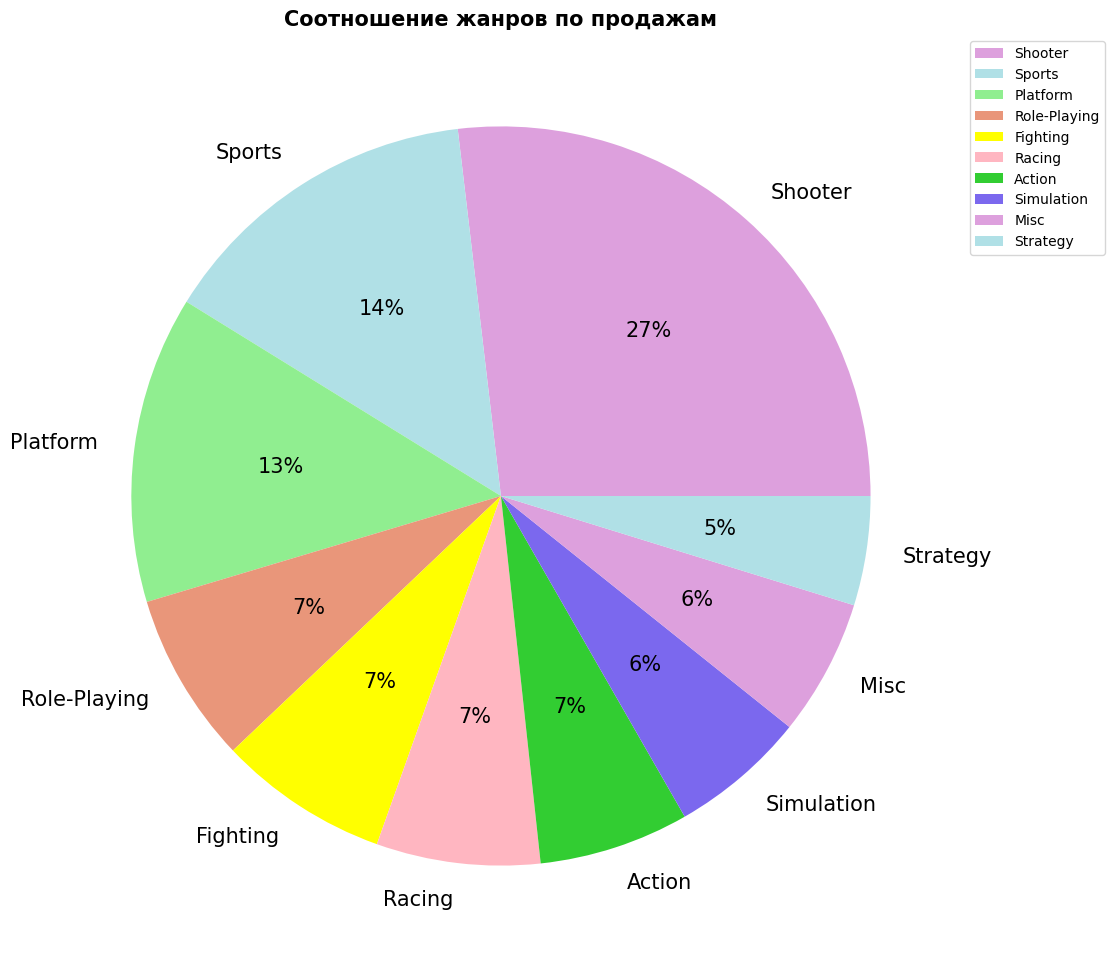

In [96]:
current_period.pivot_table(index='genre', \
                           values='revenue', \
                           aggfunc='median') \
    .sort_values(by='revenue', ascending=False).head(10) \
    .plot(
    x='genre',
    y='revenue', 
    kind='pie',
    figsize=(12, 12),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.title('Соотношение жанров по продажам', fontsize=15, fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1.0))
plt.ylabel(None)
plt.show()

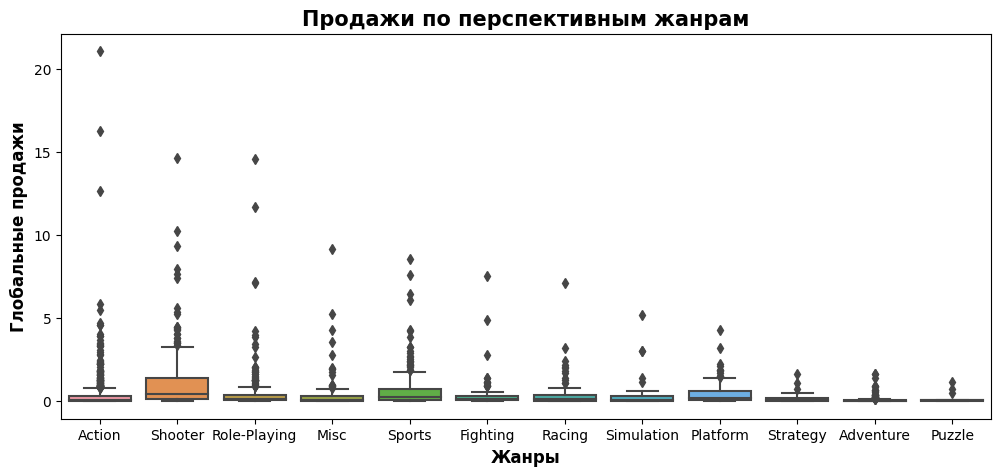

In [97]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data=current_period, x='genre', y='revenue')
plt.title('Продажи по перспективным жанрам', fontsize=15, fontweight="bold")
plt.xlabel('Жанры', fontsize=12, fontweight="bold")
plt.ylabel('Глобальные продажи',fontsize=12, fontweight="bold")
plt.show()

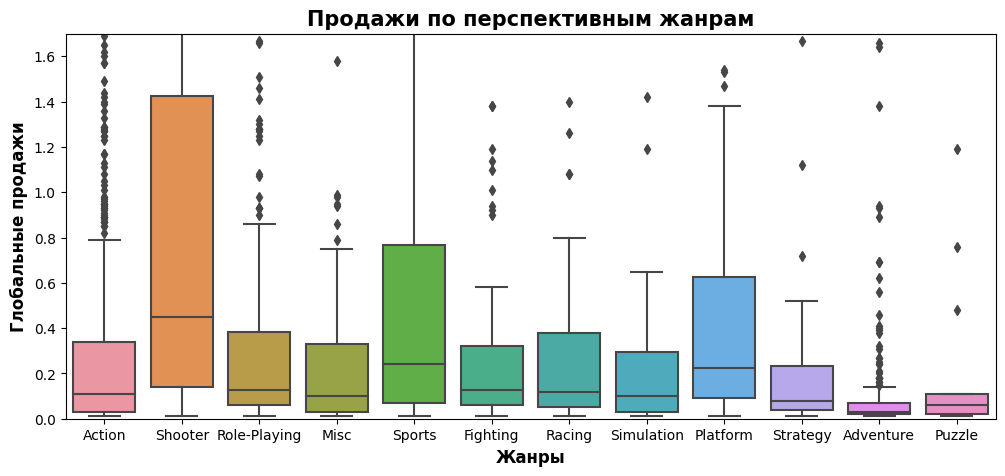

In [98]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data=current_period, x='genre', y='revenue')
ax.set(ylim=(0,1.7))
plt.title('Продажи по перспективным жанрам', fontsize=15, fontweight="bold")
plt.xlabel('Жанры', fontsize=12, fontweight="bold")
plt.ylabel('Глобальные продажи',fontsize=12, fontweight="bold")
plt.show()

In [99]:
#Сводная таблица по медианным продажам
current_period.pivot_table(index='genre', values='revenue', aggfunc='median') \
    .sort_values(by='revenue', ascending=False).round(2).T

genre,Shooter,Sports,Platform,Role-Playing,Fighting,Racing,Action,Simulation,Misc,Strategy,Puzzle,Adventure
revenue,0.45,0.24,0.22,0.12,0.12,0.12,0.11,0.1,0.1,0.08,0.06,0.03


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- Самым продаваемым жанром в играх является `Action`, после идет жанр `Shooter`, хуже всего продаётся `Puzzle`
- При сравнении медианных продаж становится очевидно, что жанры `Shooter` и `Sports` пользуются большей популярностью, так как их медианное значение выше.
- Почти все жанры имеют аномальные значения.  
</div>

<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; padding: 10px;">

**Вывод по разделу:** 
   
- Наблюдался подъём после 1994 год, скорее всего из за появления ныне популярных игровых консолей, например `PlayStation`. Пик продаж приходится на 2008 год, где возможно был технологический прорыв в игровой индустрии. В период с 2008 по 2010 год игровая индустрия продолжала развиваться, после произошел спад.
- Анализ сумарных продаж показал, что имеются 6 платформ с наибольшим количеством продаж, `PS2, X360, PS3, Wii, DS, PS`. Сводные таблицы показывают, что Платформы компании Sony (`PS2 - 1233.56, PS3 - 931.33, PS - 727.58`) и Microsoft (`X360 - 961.24`) удерживают лидерство, так же в пятерку входят две Японские консоли компании Nintendo (`Wii - 891.18, DS - 802.76`)
- По результатам исследования было выяснено, что жизненный цикл платформы составляет 5-10 лет, построены графики
- Было выяснено, что самыми продаваемыми платформами являются `PS4 - 314, PS3 - 181, XOne - 159 , 3DS - 143, X360 - 137, WiiU - 65, PC - 39, PSV - 33, Wii - 14, PSP - 3`. Заметно падение продаж у всех консолей с 2013 по 2016 год.
- Были обнаружены аномальные значения на каждой популярной платформе, по каждой были рассмотрены графики.
- Прдажи слабо зависят от оценки критиков, но не зависит от оценки пользователей.
- При сравнении медианных значений продаж видно, что жанры `Shooter` и `Sports` пользуются большей популярностью, так как их медианное значение выше, а значит надо отдавать предпочтение данным жанрам при выборе игр.

</div>

## Шаг №4 Портрет пользователя каждого региона

### Самые популярные платформы по регионам

In [100]:
# Сводная таблица по платформам в Северной Америке
na_sales_platform = current_period \
    .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum') \
    .sort_values('na_sales', ascending=False).reset_index()

In [101]:
na_sales_platform.loc[5:,'platform'] = 'other_platform'
na_sales_platform.loc[5,'na_sales'] =  na_sales_platform.loc[5:,'na_sales'] \
    .sum().round(2)
na_sales_platform = na_sales_platform.iloc[0:6, :]

In [102]:
display('Популярные платформы в Северной Америке')
display(na_sales_platform.T)

'Популярные платформы в Северной Америке'

,0,1,2,3,4,5
platform,PS4,XOne,X360,PS3,3DS,other_platform
na_sales,108.74,93.12,81.66,63.5,38.2,52.49


In [104]:
# Сводная таблица по платформам в Европе
eu_sales_platform = current_period \
    .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).reset_index()

In [105]:
eu_sales_platform.loc[5:,'platform'] = 'other_platform'
eu_sales_platform.loc[5,'eu_sales'] =  eu_sales_platform.loc[5:,'eu_sales'] \
    .sum().round(2)
eu_sales_platform = eu_sales_platform.iloc[0:6, :]

In [106]:
display('Популярные платформы в Европе')
display(eu_sales_platform.T)

'Популярные платформы в Европе'

,0,1,2,3,4,5
platform,PS4,PS3,XOne,X360,3DS,other_platform
eu_sales,141.09,67.81,51.59,42.52,30.96,58.26


In [108]:
# Сводная таблица по платформам в Японии
jp_sales_platform = current_period \
    .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False).reset_index()

In [109]:
jp_sales_platform.loc[5:,'platform'] = 'other_platform'
jp_sales_platform.loc[5,'jp_sales'] =  jp_sales_platform.loc[5:,'jp_sales'] \
    .sum().round(2)
jp_sales_platform = jp_sales_platform.iloc[0:6, :]

In [110]:
display('Популярные платформы в Японии')
display(jp_sales_platform.T)

'Популярные платформы в Японии'

,0,1,2,3,4,5
platform,3DS,PS3,PSV,PS4,WiiU,other_platform
jp_sales,67.81,23.35,18.59,15.96,10.88,4.19


In [112]:
# Сводная таблица по продажи в других странах
other_sales_platform = current_period \
    .pivot_table(index='platform', values='other_sales', aggfunc='sum') \
    .sort_values(by='other_sales', ascending=False).reset_index()

In [113]:
other_sales_platform.loc[5:,'platform'] = 'other_platform'
other_sales_platform.loc[5,'other_sales'] =  other_sales_platform.loc[5:,'other_sales'] \
    .sum().round(2)
other_sales_platform = other_sales_platform.iloc[0:6, :]


In [114]:
display('Популярные платформы в других странах')
display(other_sales_platform.T)

'Популярные платформы в других странах'

,0,1,2,3,4,5
platform,PS4,PS3,XOne,X360,3DS,other_platform
other_sales,48.35,26.77,14.27,12.11,6.28,12.19


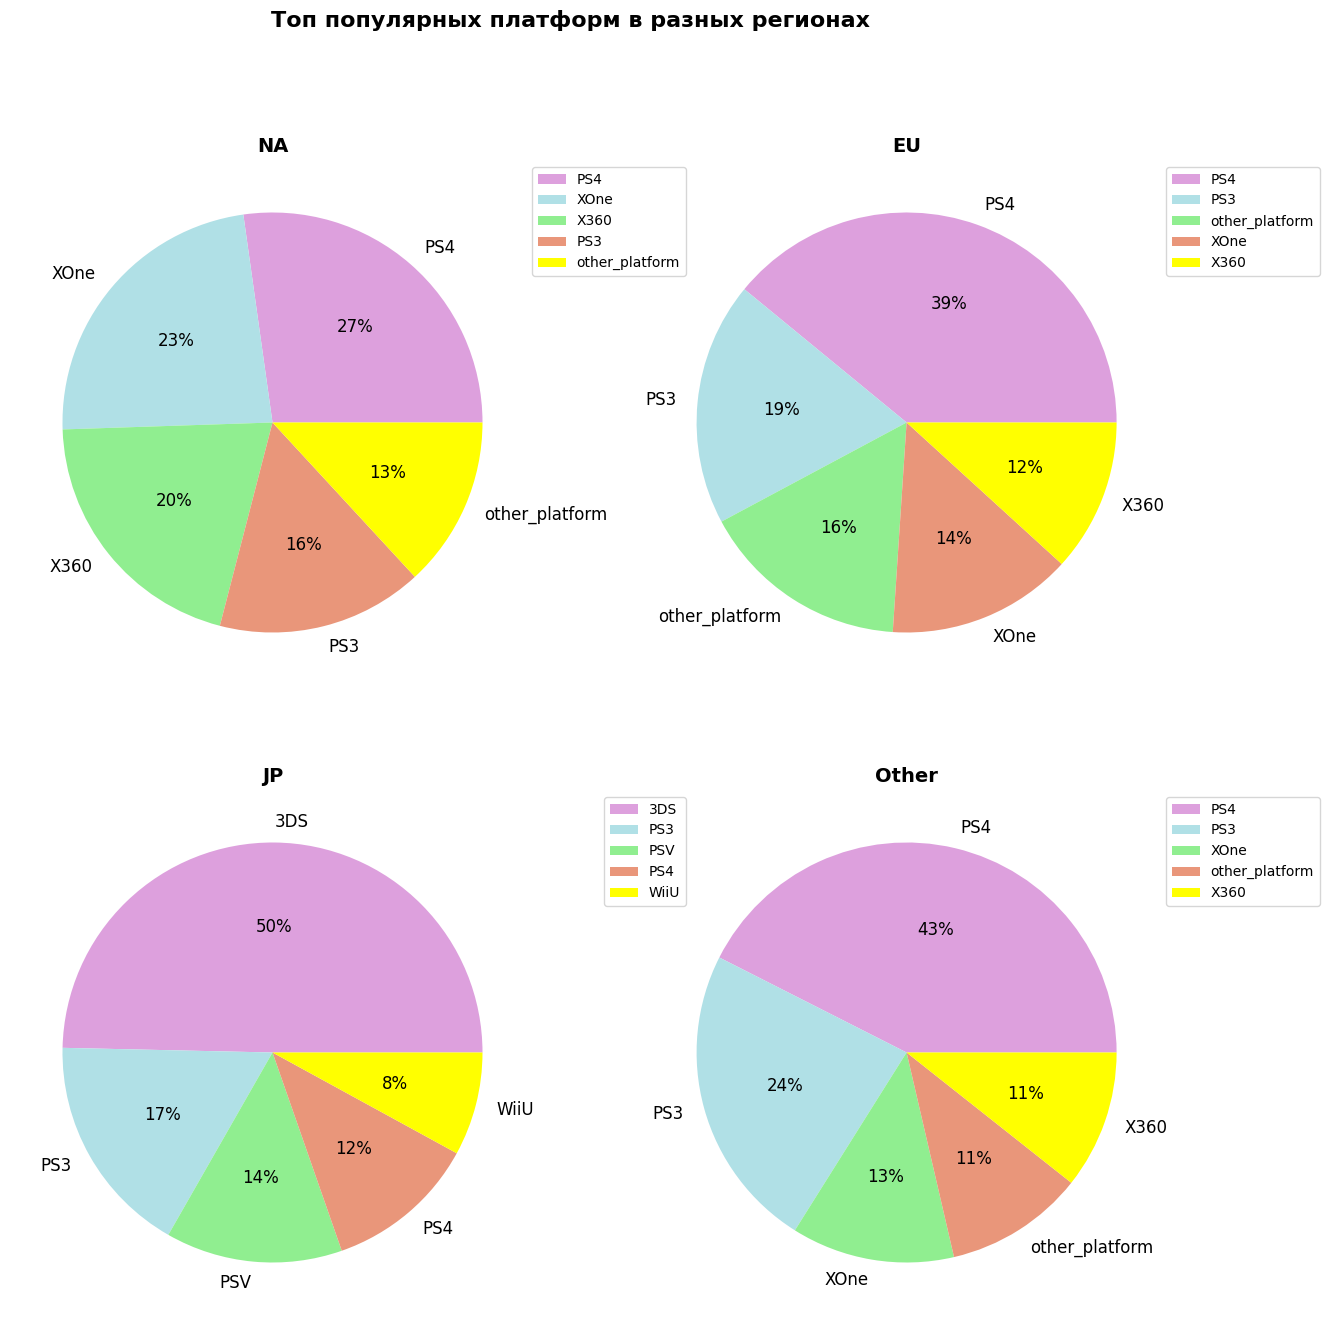

In [116]:
#Переменные
df_na_sales = na_sales_platform.pivot_table(values='na_sales',index='platform') \
    .sort_values(by='na_sales', ascending=False).head()
df_eu_sales = eu_sales_platform.pivot_table(values='eu_sales',index='platform') \
    .sort_values(by='eu_sales', ascending=False).head()
df_jp_sales = jp_sales_platform.pivot_table(values='jp_sales',index='platform') \
    .sort_values(by='jp_sales', ascending=False).head()
df_other_sales = other_sales_platform.pivot_table(values='other_sales',index='platform') \
    .sort_values(by='other_sales', ascending=False).head()


p = '%1.0f%%' #Вывод в процентах


fig, a = plt.subplots(2, 2 , figsize=(15, 15)) #Размер

#Общее название
fig.suptitle('Топ популярных платформ в разных регионах', fontsize=16, fontweight="bold")


#Круговые диаграммы
df_na_sales.plot(ax=a[0,0], kind='pie', autopct=p, ylabel='', colors=color_list, fontsize=12, y="na_sales")
df_eu_sales.plot(ax=a[0,1], kind='pie', autopct=p, ylabel='', colors=color_list, fontsize=12, y="eu_sales")
df_jp_sales.plot(ax=a[1,0], kind='pie', autopct=p, ylabel='', colors=color_list, fontsize=12, y="jp_sales")
df_other_sales.plot(ax=a[1,1], kind='pie', autopct=p, ylabel='', colors=color_list, fontsize=12, y="other_sales")

a[0, 0].set_title('NA', fontsize=14, fontweight="bold") #Название диаграмм
a[0, 1].set_title('EU', fontsize=14, fontweight="bold")
a[1, 0].set_title('JP', fontsize=14, fontweight="bold")
a[1, 1].set_title('Other', fontsize=14, fontweight="bold")

for ax in a.flat:
 ax.legend(bbox_to_anchor=(1.3, 1.0)) #Расположение легенды

plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- Различия в популярности платформ связаны с влиянием определённых компаний. В большинстве рейтингов можно найти продукцию Sony.
- Второе отличие заключается в расположении компаний. Успех `Xbox One` и `Xbox 360` в Северной Америке объясняется присутствием крупного игрока в лице Microsoft. В Японии аналогичная ситуация наблюдается с `Nintendo` и её продуктами `3DS` и `WiiU`. Европейский рынок ориентируется на общую популярность платформы, поскольку крупные разработчики здесь отсутствуют, в основном европейский рынок делает акцент на популярную компанию `Sony`, это видно по 2м лидирующим там платформам.
</div>

### Самые популяные жанры

In [117]:
# Сводная таблица по жанрам в Северной Америке
na_sales_genre = current_period \
    .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum') \
    .sort_values('na_sales', ascending=False).reset_index()

In [118]:
na_sales_genre.loc[5:,'genre'] = 'other_genre'
na_sales_genre.loc[5,'na_sales'] =  na_sales_genre.loc[5:,'na_sales'] \
    .sum().round(2)
na_sales_genre = na_sales_genre.iloc[0:6, :]

In [119]:
display('Популярные жанры в Северной Америке')
display(na_sales_genre.T)

'Популярные жанры в Северной Америке'

,0,1,2,3,4,5
genre,Action,Shooter,Sports,Role-Playing,Misc,other_genre
na_sales,126.05,109.74,65.27,46.4,27.49,62.76


In [121]:
# Сводная таблица по жанрам в Европе
eu_sales_genre = current_period \
    .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum') \
    .sort_values('eu_sales', ascending=False).reset_index()

In [122]:
eu_sales_genre.loc[5:,'genre'] = 'other_genre'
eu_sales_genre.loc[5,'eu_sales'] =  eu_sales_genre.loc[5:,'eu_sales'] \
    .sum().round(2)
eu_sales_genre = eu_sales_genre.iloc[0:6, :]

In [123]:
display('Популярные жанры в Европе')
display(eu_sales_genre.T)

'Популярные жанры в Европе'

,0,1,2,3,4,5
genre,Action,Shooter,Sports,Role-Playing,Racing,other_genre
eu_sales,118.13,87.86,60.52,36.97,20.19,68.56


In [125]:
# Сводная таблица по жанрам в Японии
jp_sales_genre = current_period \
    .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum') \
    .sort_values('jp_sales', ascending=False).reset_index()

In [126]:
jp_sales_genre.loc[5:,'genre'] = 'other_genre'
jp_sales_genre.loc[5,'jp_sales'] =  jp_sales_genre.loc[5:,'jp_sales'] \
    .sum().round(2)
jp_sales_genre = jp_sales_genre.iloc[0:6, :]

In [127]:
display('Популярные жанры в Японии')
display(jp_sales_genre.T)

'Популярные жанры в Японии'

,0,1,2,3,4,5
genre,Role-Playing,Action,Misc,Fighting,Shooter,other_genre
jp_sales,51.04,40.49,9.2,7.65,6.61,25.79


In [129]:
# Сводная таблица по жанрам в Японии
other_sales_genre = current_period \
    .pivot_table(index=['genre'], values=['other_sales'], aggfunc='sum') \
    .sort_values('other_sales', ascending=False).reset_index()

In [130]:
other_sales_genre.loc[5:,'genre'] = 'other_genre'
other_sales_genre.loc[5,'other_sales'] =  other_sales_genre.loc[5:,'other_sales'] \
    .sum().round(2)
other_sales_genre = other_sales_genre.iloc[0:6, :]

In [131]:
display('Популярные жанры в других странах')
display(other_sales_genre.T)

'Популярные жанры в других странах'

,0,1,2,3,4,5
genre,Action,Shooter,Sports,Role-Playing,Misc,other_genre
other_sales,37.2,28.77,19.45,11.48,6.09,16.98


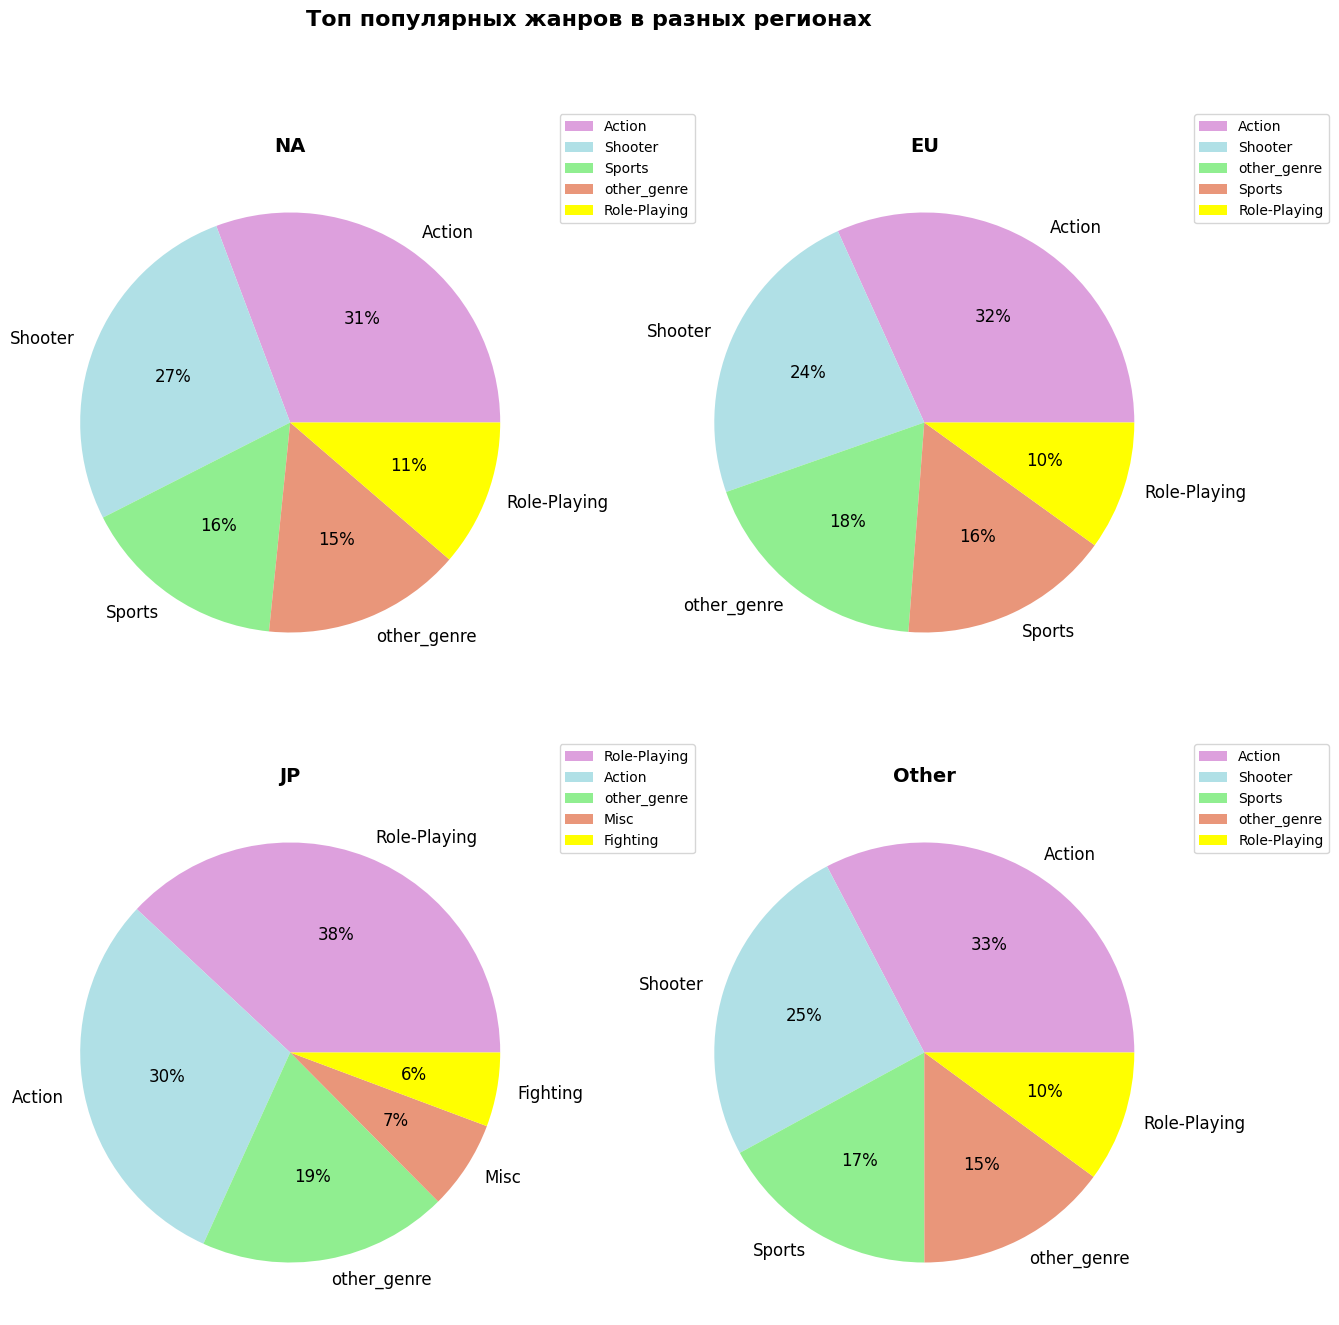

In [133]:
#Переменные
genre_na_sales = na_sales_genre.pivot_table(values='na_sales',index='genre') \
    .sort_values(by='na_sales', ascending=False).head()
genre_eu_sales = eu_sales_genre.pivot_table(values='eu_sales',index='genre') \
    .sort_values(by='eu_sales', ascending=False).head()
genre_jp_sales = jp_sales_genre.pivot_table(values='jp_sales',index='genre') \
    .sort_values(by='jp_sales', ascending=False).head()
genre_other_sales = other_sales_genre.pivot_table(values='other_sales',index='genre') \
    .sort_values(by='other_sales', ascending=False).head()

p = '%1.0f%%'


fig, a = plt.subplots(2, 2 , figsize=(15, 15)) #Размеры

fig.suptitle('Топ популярных жанров в разных регионах', fontsize=16, fontweight="bold") #Общее название

#Диаграммы
genre_na_sales.plot(ax=a[0,0], kind='pie', autopct=p, ylabel='', colors=color_list, fontsize=12, y="na_sales") 
genre_eu_sales.plot(ax=a[0,1], kind='pie', autopct=p, ylabel='', colors=color_list, fontsize=12, y="eu_sales")
genre_jp_sales.plot(ax=a[1,0], kind='pie', autopct=p, ylabel='', colors=color_list, fontsize=12, y="jp_sales")
genre_other_sales.plot(ax=a[1,1], kind='pie', autopct=p, ylabel='', colors=color_list, fontsize=12, y="other_sales")

a[0, 0].set_title('NA', fontsize=14, fontweight="bold") #Заголовки
a[0, 1].set_title('EU', fontsize=14, fontweight="bold")
a[1, 0].set_title('JP', fontsize=14, fontweight="bold")
a[1, 1].set_title('Other', fontsize=14, fontweight="bold")

for ax in a.flat:
 ax.legend(bbox_to_anchor=(1.0, 1.1)) #Расположение легенды

plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- Американские, европейские и японские игроки имеют схожие предпочтения в жанрах, однако японские игроки больше интересуются играми с глубоким смыслом. Несмотря на это, игры в жанрах экшн и шутеров всегда будут популярны, так как эти жанры знакомы многим поколениям игроков.
</div>

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [194]:
# Сводная таблица по рейтингу в Северной Америке
na_sales_rating = current_period.pivot_table(index='rating', values=['na_sales'], aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False) \
    .round(0).T
na_sales_rating

rating,M,unknow,E,E10+,T
na_sales,165.0,89.0,79.0,54.0,50.0


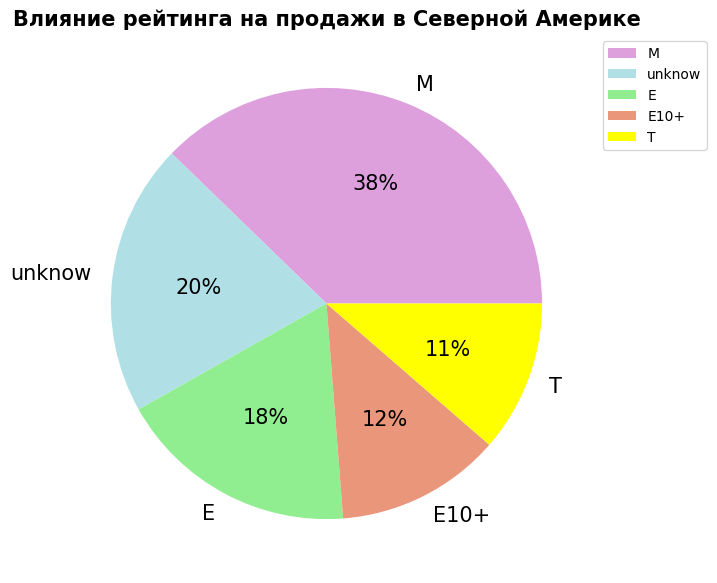

In [186]:
current_period.pivot_table(index='rating', \
                           values='na_sales', \
                           aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False).head() \
    .plot(
    x='rating',
    y='na_sales', 
    kind='pie',
    figsize=(10, 7),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.title('Влияние рейтинга на продажи в Северной Америке', fontsize=15, fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1.0))
plt.ylabel(None)
plt.show()

In [187]:
# Сводная таблица по рейтингу в Европе
eu_sales_rating = current_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False) \
    .round(0).T
eu_sales_rating

rating,M,E,unknow,E10+,T
eu_sales,145.0,83.0,79.0,43.0,42.0


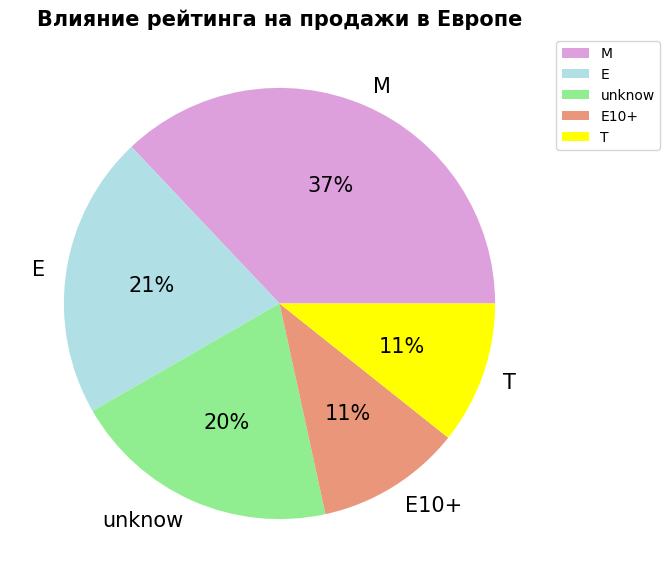

In [188]:
current_period.pivot_table(index='rating', \
                           values='eu_sales', \
                           aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).head() \
    .plot(
    x='rating',
    y='eu_sales', 
    kind='pie',
    figsize=(10, 7),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.title('Влияние рейтинга на продажи в Европе', fontsize=15, fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1.0))
plt.ylabel(None)
plt.show()

In [189]:
# Сводная таблица по рейтингу в Японии
jp_sales_rating = current_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False) \
    .round(0).T
jp_sales_rating

rating,unknow,T,E,M,E10+
jp_sales,85.0,21.0,15.0,14.0,6.0


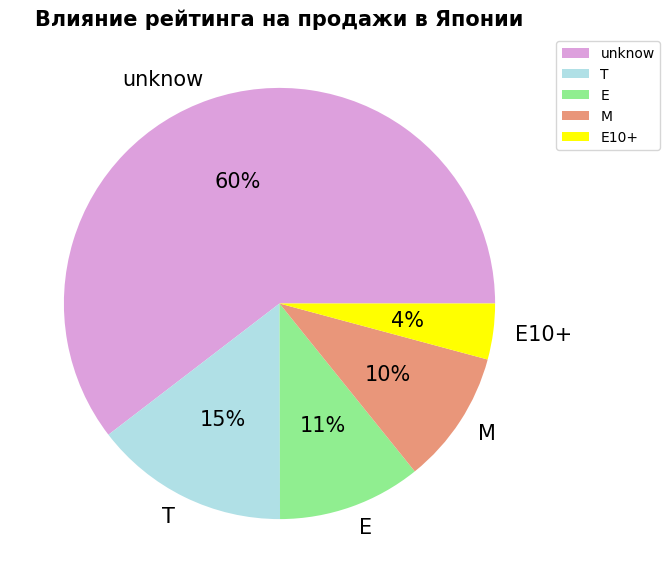

In [190]:
current_period.pivot_table(index='rating', \
                           values='jp_sales', \
                           aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False).head() \
    .plot(
    x='rating',
    y='jp_sales', 
    kind='pie',
    figsize=(10, 7),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.title('Влияние рейтинга на продажи в Японии', fontsize=15, fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1.0))
plt.ylabel(None)
plt.show()

In [191]:
# Сводная таблица по рейтингу в других странах
other_sales_rating = current_period.pivot_table(index='rating', values='other_sales', aggfunc='sum') \
    .sort_values(by='other_sales', ascending=False) \
    .round(0).T
other_sales_rating

rating,M,unknow,E,T,E10+
other_sales,47.0,23.0,23.0,14.0,13.0


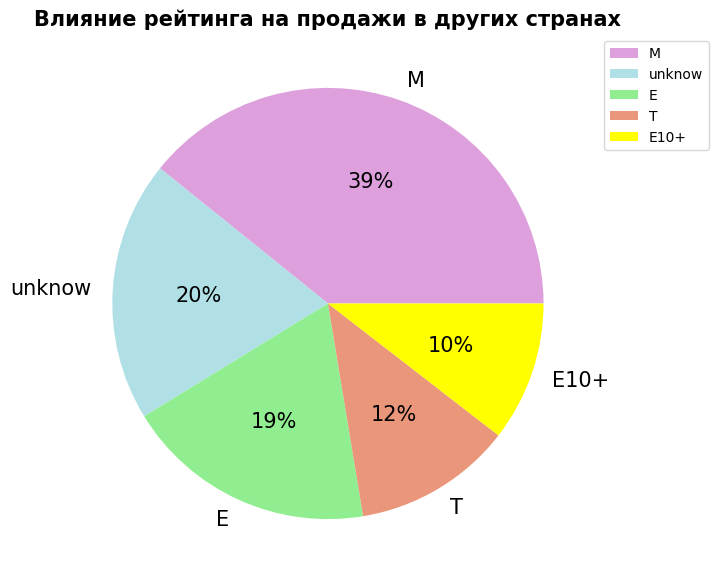

In [192]:
current_period.pivot_table(index='rating', \
                           values='other_sales', \
                           aggfunc='sum') \
    .sort_values(by='other_sales', ascending=False).head() \
    .plot(
    x='rating',
    y='other_sales', 
    kind='pie',
    figsize=(10, 7),
    autopct='%1.0f%%',
    colors=color_list,
    fontsize=15
)
plt.title('Влияние рейтинга на продажи в других странах', fontsize=15, fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1.0))
plt.ylabel(None)
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Вывод:**  
    
- Рейтинг действительно влияет на продажи, и предпочтения покупателей могут отличаться в зависимости от региона. В Северной Америке и Европе предпочитают рейтинг «M», в Японии лидирует «unknow» - не указанный рейтинг, а в других странах также выбирают рейтинг «M». Это показывает, что покупатели в разных странах имеют разные предпочтения. Рейтинг «М» популярен, потому что он предназначен для широкой аудитории, включая подростков старше 17 лет. Этот рейтинг указывает на то, что в играх присутствуют материалы, которые могут быть неподходящими для детей младшего возраста, но могут быть интересны подросткам и взрослым.
</div>

<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; padding: 10px;">

**Вывод по разделу:** 
   
- По имеющимся данным можно сделать вывод, но сложно говорить точно - очень много пропусков в данных: пользователи из разных регионов имеют различные возрастные категории и предпочтения в игровых платформах и жанрах игр. Американский и европейский игроки старше 17 лет предпочитают играть на консолях `PlayStation 4`, а так же `Xbox One` и `Xbox 360`, в то время как японский игрок от 13 лет выбирает портативные консоли `3DS` и `PSV`. Все они любят игры в жанрах реакции, шутеров и RPG, но японские игроки также предпочитает ролевые игры и экшены. Эти различия в предпочтениях указывают на культурные особенности и предпочтения игроков из разных регионов. Так же в основном большинство Американских и Европейских игроков отдают своё предпочтение рейтингу `M` (для взрослых), японские игроки предпочитают `«unknow»` - не указанный рейтинг, а так же рейтинг `T`, для подростков от 13 лет.

</div>

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [142]:
#Срез по платформе XOne
user_score_xone = current_period \
    .query("platform == 'XOne' and user_score > -1")

In [143]:
user_score_xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50


In [144]:
user_score_xone.isna().sum() #Проверка на пропуски

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
revenue            0
dtype: int64

In [145]:
user_score_xone['user_score'].describe().round(2)

count    182.00
mean       6.52
std        1.38
min        1.60
25%        5.80
50%        6.80
75%        7.50
max        9.20
Name: user_score, dtype: float64

In [146]:
#Срез по платформе PC
user_score_pc = current_period \
    .query("platform == 'PC' and user_score > -1")

In [147]:
user_score_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86,7.9,T,1.67
1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64,2.2,E10+,1.42
1437,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81,6.0,M,1.36
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28


In [148]:
user_score_pc.isna().sum() #Проверка на пропуски

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
revenue            0
dtype: int64

In [149]:
user_score_pc['user_score'].describe().round(2)

count    155.00
mean       6.27
std        1.74
min        1.40
25%        5.30
50%        6.80
75%        7.60
max        9.30
Name: user_score, dtype: float64

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">
    
**Проверка гипотезы**
- За H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны.
- За H1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны.
- Для проверки гипотезы будет использоваться метод `ttest_ind` и аргументы `alternative='two-sided'` для проверки двухсторонней гипотезы и `equal_var=False` для разных дисперсий.
    <div>

In [150]:
alpha = 0.05 # уровень статистической значимости

In [151]:
display(f"Дисперсия выборки xone = {user_score_xone['user_score'].var().round(2)}")
display(f"Среднее пользовательского рейтинга xone = {user_score_xone['user_score'].mean().round(2)}")

'Дисперсия выборки xone = 1.91'

'Среднее пользовательского рейтинга xone = 6.52'

In [152]:
display(f"Дисперсия выборки PC = {user_score_pc['user_score'].var().round(2)}")
display(f"Среднее пользовательского рейтинга PC = {user_score_pc['user_score'].mean().round(2)}")

'Дисперсия выборки PC = 3.04'

'Среднее пользовательского рейтинга PC = 6.27'

In [153]:
results = st.ttest_ind(user_score_xone['user_score'], #Выборка xone
                      user_score_pc['user_score'], #Выборка РС
                      equal_var=False, #Для различных дисперсий
                      alternative='two-sided') #Проверка двухсторонней гипотезы

In [154]:
display(f'p-значение: {results.pvalue}')

'p-значение: 0.14759594013430463'

In [155]:
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'Не получилось отвергнуть нулевую гипотезу'

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
- Полученное значение `p-value: 0.14759594013430463` больше заданного уровня значимости - 5%, а значит не получилось отвергнуть нулевую гипотезу.
- Результаты исследования показали, что оценки пользователей Xbox One и PC практически идентичны. Это подтверждает предположение о том, что уровень удовлетворённости пользователей обеих платформ примерно одинаковый.
</div>

### Средние пользовательские рейтинги жанров Action разные

In [156]:
#Срез по жанру Action
user_score_action = current_period \
    .query("genre == 'Action' and user_score > 0")

In [157]:
user_score_action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47


In [158]:
user_score_action.isna().sum() #Проверка на пропуски

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
revenue            0
dtype: int64

In [159]:
#Срез по жанру Sports
user_score_sports = current_period \
    .query("genre == 'Sports' and user_score > 0")

In [160]:
user_score_sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,-1,4.5,E,4.28


In [161]:
user_score_sports.isna().sum() #Проверка на пропуски

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
revenue            0
dtype: int64

In [162]:
user_score_action['user_score'].describe().round(2)

count    389.00
mean       6.84
std        1.33
min        2.00
25%        6.30
50%        7.10
75%        7.80
max        9.10
Name: user_score, dtype: float64

In [163]:
user_score_sports['user_score'].describe().round(2)

count    160.00
mean       5.24
std        1.78
min        0.20
25%        4.10
50%        5.50
75%        6.50
max        8.80
Name: user_score, dtype: float64

In [164]:
display(f"Дисперсия выборки action = {user_score_action['user_score'].var().round(2)}")
display(f"Среднее пользовательского жанра action = {user_score_action['user_score'].mean().round(2)}")

'Дисперсия выборки action = 1.77'

'Среднее пользовательского жанра action = 6.84'

In [165]:
display(f"Дисперсия выборки sports = {user_score_sports['user_score'].var().round(2)}")
display(f"Среднее пользовательского жанра sports = {user_score_sports['user_score'].mean().round(2)}")

'Дисперсия выборки sports = 3.18'

'Среднее пользовательского жанра sports = 5.24'

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">
    
**Проверка гипотезы**
- За H0 - Средние пользовательские рейтинги жанров Action и Sports равны.
- За H1 - Средние пользовательские рейтинги платформ Action и Sports не равны.
- Для проверки гипотезы будет использоваться метод `ttest_ind` и аргументы `alternative='two-sided'` для проверки двухсторонней гипотезы и `equal_var=False` для разных дисперсий.
    <div>

In [166]:
alpha = 0.05 # уровень статистической значимости

In [167]:
results = st.ttest_ind(user_score_action['user_score'], #Выборка xone
                      user_score_sports['user_score'], #Выборка РС
                      equal_var=False, #Для различных дисперсий
                      alternative='two-sided') #Проверка двухсторонней гипотезы

In [168]:
display(f'p-значение: {results.pvalue}')

'p-значение: 1.4460039700704318e-20'

In [169]:
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'Отвергаем нулевую гипотезу'

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">

**Вывод:** 
- Полученное значение `p-value: 1.4460039700704315e-20` меньше заданного уровня значимости - 5%, а значит отвергаем нулевую гипотезу.
- Результаты исследования демонстрируют, что оценки пользователей для жанров Action и Sports различаются. Это свидетельствует о том, что уровень удовлетворённости пользователей этими жанрами может быть разным.
</div>

<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; padding: 10px;">

**Вывод по разделу:** 
- В ходе предыдущего анализа было обнаружено, что выборочные средние значения соответствуют нормальному распределению, а размер выборок является достаточным (более 30 наблюдений), что указывает на необходимость нормального распределения исходных значений. Таким образом, для проверки гипотез можно использовать статистические методы анализа и t-критерий Стьюдента.  
- Проверены 2 гипотезы:
    - Результаты исследования показали, что средние пользовательские рейтинги платформ Xbox One и PC практически одинаковы. Значение `p-value (0,14759594013430463)` превышает заданный уровень значимости `(5%)`, что не позволяет отвергнуть нулевую гипотезу. Это означает, что удовлетворённость пользователей этих платформ примерно равна, и конкуренция за пользователей между ними высока. 
    -  В ходе проверки гипотезы о различии средних пользовательских оценок жанров Action и Sports было установлено, что значение `p-value (1,4460039700704315e-20)` меньше заданного уровня значимости `(5 %)`. Это привело к отклонению нулевой гипотезы о равенстве оценок для этих жанров. Оценки жанров Action и Sports могут различаются из-за разницы в акцентах и особенностях каждого жанра. Action делает упор на скорость и динамику использования игровых механик, в то время как Sports ориентирован на симуляцию различных видов спорта. Эти различия в приоритетах и подходе к игровому процессу могут влиять на восприятие и оценку игроками каждого жанра.
</div>

## Общий вывод  
<div style="color: #000000; border-radius: 10px; box-shadow: 2px 2px 4px; border: 1px solid; padding: 10px">
<h4><font color="#0000CD">Общий вывод:</font></h4>

1. **Были открыт DataFrame:**
    - **`users_go`** содержит 16715 строк и 11 столбцов, имеются пропуски в столбцах **`Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating`**, дубликатов не обнаружено, названия колонок имеют нарушение стилей, у некоторых неверный тип.
   
2. **В процессе предобработки данных были изменены:**
    - столбцы DataFrame приведены к нижнему регистру.
    - Обработаны столбцы: **`name`** были удалены пропуски, **`year_of_release`** - удалены пропуски и преобразование к целочисленному значению, **`critic_score`** - пропущеные значения заменены на 0 и прeобразование к целочисленному значению, **`user_score`** - пропуски заменены на 0, преобразован к типу float, `rating` - пропуски заменены на `unknow`.
    - добавлен столбец с суммарными продажами во всех регионах.

    
3. **Было рассмотрено количество выпущенных игр по годам**, построены графики, было выяснено, что был подъём продаж после 1994 года, возможно это связано с тем, что начали появляться игровые консоли, например `PlayStation`, а так же персональные компьютеры. В 2002 году было выпущенно достаточно много игр - 829, скорее всего это связано с появилось достаточно много игровых техологий. Пик продаж приходится на 2008 год, где возможно был технологический прорыв в игровой индустрии. В период с 2008 по 2010 год игровая индустрия продолжала развиваться, после произошел спад.
    - Проанализиров изменения продаж на игровых платформах, были построены графики. Согласно полученным данным, PS2 занимает первое место по продажам с результатом 2127 экземпляров. Также в десятку лидеров вошли ещё две консоли компании Sony: PS3 (1306 экземпляров) и PS (1190 экземпляров). Главный конкурент Microsoft предлагает консоли X360 (1232 экземпляра) и XB (803 экземпляра). Время появления и исчезновения платформ варьируется в районе 10 лет. Актуальным был выбран период за последние 4 года.
    - Были проанализированы продажи и падения платформ, за период с 2013 по 2016 год PlayStation 4 стала самой продаваемой игровой консолью, с общим количеством проданных экземпляров 314. В пятёрку лидеров также попали PlayStation 3 (181 экземпляр), Xbox One (159 экземпляров), Nintendo 3DS (143 экземпляра) и Xbox 360 (137 экземпляров). Анализ данных показывает снижение продаж для всех консолей за указанный период.
    - Построен график «ящик с усами» по глобальным продажам игр в разбивке, график продемонстрировал, что медиана находится в диапазоне - 0.11, первый квартиль - 0.03, третий квартиль на 0.40, после 0.90 заметны аномальные значения. Так же были построены графики для отдельных платформ: `PS4, PS3, XOne, 3DS, X360`, на все графиках имеются выбросы.
    - Был проведен анализ влияния отзывов на продажи внутри одной платформы, коэффициент корреляции пирсона и диаграммы рассеяния показали, что продажи не зависят от оценки пользователей или оценки критиков как в пределах одной платформы, так и на разных платформах.
    - Проведен анализ распределения по жанрам, а так же построена диаграмма, выяснено, что самым популярным жанром является `Action` с продажами - 322 млн.копий, на втором месте расположился `Shooter` c продажами - 233 млн.копий, хуже всего продается жанр `Puzzle` всего - 3 млн.копий, но при сравнении медианных значений продаж видно, что жанры `Shooter` и `Sports` пользуются большей популярностью, так как их медианное значение выше, а значит надо отдавать предпочтение данным жанрам при выборе игр.
    
    
4. **Был составлен портрет пользователя каждого региона, построены диаграммы с соотношениями платформ:**
    - В Северной Америке, Европе и других странах самой популярной является консоль `PS4`, когда как в Японии популярны портативные консоли.
    - Самым популярным жанром в Северной Америке, Европе и других странах стал `Action` и `Shooter`, в Японии популярным стал `Role-Playing` и `Action`.
    - Было проанализировано влияния рейтинга ESRB на продажи в регионах: рейтинги оказывают существенное влияние на продажи и предпочтения потребителей в различных регионах. В Северной Америке и Европе предпочитают рейтинг «M», в Японии лидирует «неуказанный» рейтинг, а в остальных странах также выбирают рейтинг «M». Это свидетельствует о разнообразии вкусов покупателей в разных странах. Популярность рейтинга «M» объясняется тем, что он ориентирован на широкую аудиторию, включая подростков старше 17 лет. Этот рейтинг указывает на наличие материалов, которые могут быть неприемлемыми для детей младшего возраста, но могут быть интересными для подростков и взрослых.
    
    
5. **Проверены 2 гипотезы**:
    - **средние пользовательские рейтинги платформ Xbox One и PC одинаковые** - была проверена двухсторонняя гипотеза, Полученное значение `p-value` оказалось больше заданного уровня значимости - 5%, а значит не получилось отвергнуть нулевую гипотезу, результаты исследования показали, что оценки пользователей Xbox One и PC практически идентичны. Это подтверждает предположение о том, что уровень удовлетворённости пользователей обеих платформ примерно одинаковый.
    - **Средние пользовательские рейтинги жанров Action и Sports разные** - полученное значение `p-value:` оказалось меньше заданного уровня значимости - 5%, а значит отвергаем нулевую гипотезу. Результаты исследования демонстрируют, что оценки пользователей для жанров Action и Sports различаются. Это свидетельствует о том, что уровень удовлетворённости пользователей этими жанрами может быть разным. Жанр экшн и спорт отличаются по оценке пользователей из-за разных ожиданий и предпочтений. Экшн-игры часто характеризуются быстрым темпом, интенсивностью и адреналином, в то время как спортивные игры фокусируются на реалистичном симуляции спортивных событий и соревнований. Оценка пользователей может зависеть от их личных предпочтений, опыта и ожиданий от игрового процесса.


Учитывая результаты анализа рынка, закономерности и предпочтений потребителей, для увеличения прибыли интернет магазину "Стримчик" на 2017 год:
    
Делать ставки на современные платформы, такие как PS4, XOne и 3DS, с акцентом на популярные жанры, такие как экшены, шутеры, спортивные и ролевые игры, а так же с рейтингом М (для взрослых). Важно следить за целевой аудиторией, которая в основном состоит из игроков старше 17 лет. Также необходимо распространять компьютерные игры и портировать их с популярных платформ на PC, так как компьютеры продолжают конкурировать за игроков.

По каждому разделу написаны предварительные выводы и разъяснения.
</div>